# Clustering


In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator



In [2]:
data=pd.read_csv("responses.csv")

In [3]:
pd.set_option('display.max_columns', 999)
data.head()


Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0      1.0  5.0   5.0                1.0   1.0          1.0          1.0   
1      2.0  3.0   5.0                4.0   4.0          1.0          3.0   
2      5.0  3.0   5.0                3.0   4.0          1.0          4.0   
3      1.0  2.0   2.0                1.0   4.0          2.0          2.0   
4      3.0  5.0   3.0                1.0   2.0          5.0          3.0   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0          1.0          3.0          1.0     1.0             1.0    1.0   
1          1.0          4.0          4.0     2.0             1.0    1.0   
2          3.0          5.0          5.0     5.0             1.0    3.0   
3          1.0          2.0          5.0     1.0             2.0    1.0   
4          2.0          1.0          2.0     4.0             2.0    2.0   

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  War  \
0     5.0     4.0       2.0     5.0       4.0     4.0  1.0   
1     5.0     2.0       2.0     4.0       3.0     4.0  1.0   
2     5.0     3.0       4.0     4.0       2.0     4.0  2.0   
3     5.0     4.0       4.0     3.0       3.0     4.0  3.0   
4     5.0     4.0       4.0     5.0       2.0     3.0  3.0   

   Fantasy/Fairy tales  Animated  Documentary  Western  Action  History  \
0                  5.0       5.0          3.0      1.0     2.0      1.0   
1                  3.0       5.0          4.0      1.0     4.0      1.0   
2                  5.0       5.0          2.0      2.0     1.0      1.0   
3                  1.0       2.0          5.0      1.0     2.0      4.0   
4                  4.0       4.0          3.0      1.0     4.0      3.0   

   Psychology  Politics  Mathematics  Physics  Internet   PC  \
0         5.0       1.0          3.0      3.0       5.0  3.0   
1         3.0       4.0          5.0      2.0       4.0  4.0   
2         2.0       1.0          5.0      2.0       4.0  2.0   
3         4.0       5.0          4.0      1.0       3.0  1.0   
4         2.0       3.0          2.0      2.0       2.0  2.0   

   Economy Management  Biology  Chemistry  Reading  Geography  \
0                 5.0      3.0        3.0      3.0        3.0   
1                 5.0      1.0        1.0      4.0        4.0   
2                 4.0      1.0        1.0      5.0        2.0   
3                 2.0      3.0        3.0      5.0        4.0   
4                 2.0      3.0        3.0      5.0        2.0   

   Foreign languages  Medicine  Law  Cars  Art exhibitions  Religion  \
0                5.0       3.0  1.0   1.0              1.0       1.0   
1                5.0       1.0  2.0   2.0              2.0       1.0   
2                5.0       2.0  3.0   1.0              5.0       5.0   
3                4.0       2.0  5.0   1.0              5.0       4.0   
4                3.0       3.0  2.0   3.0              1.0       4.0   

   Countryside, outdoors  Dancing  Musical instruments  Writing  \
0                    5.0      3.0                  3.0      2.0   
1                    1.0      1.0                  1.0      1.0   
2                    5.0      5.0                  5.0      5.0   
3                    1.0      1.0                  1.0      3.0   
4                    4.0      1.0                  3.0      1.0   

   Passive sport  Active sport  Gardening  Celebrities  Shopping  \
0            1.0           5.0        5.0          1.0       4.0   
1            1.0           1.0        1.0          2.0      

In [4]:
myData=data[['Music','Slow songs or fast songs','Movies','History','Psychology','Politics','Mathematics',
'Science and technology', 'Reading', 'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
 'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes' , 'Thinking ahead', 'Keeping promises', 
 'Loss of interest',  'Friends versus money', 'Funniness', 'Fake', 'Empathy', 'Compassion to animals',
  'God', 'Number of friends', 'Lying', 'Achievements', 'Happiness in life', 'Interests or hobbies', 
  'Finances', 'Age', 'Number of siblings', 'Education', 'Village - town', ]].copy()
myColumns=myData.columns
myData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Music                     1007 non-null   float64
 1   Slow songs or fast songs  1008 non-null   float64
 2   Movies                    1004 non-null   float64
 3   History                   1008 non-null   float64
 4   Psychology                1005 non-null   float64
 5   Politics                  1009 non-null   float64
 6   Mathematics               1007 non-null   float64
 7   Science and technology    1004 non-null   float64
 8   Reading                   1004 non-null   float64
 9   Foreign languages         1005 non-null   float64
 10  Religion                  1007 non-null   float64
 11  Passive sport             995 non-null    float64
 12  Active sport              1006 non-null   float64
 13  Fun with friends          1006 non-null   float64
 14  Smoking 

In [5]:
print(myColumns)

Index(['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology',
       'Politics', 'Mathematics', 'Science and technology', 'Reading',
       'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
       'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes',
       'Thinking ahead', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Empathy',
       'Compassion to animals', 'God', 'Number of friends', 'Lying',
       'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances',
       'Age', 'Number of siblings', 'Education', 'Village - town'],
      dtype='object')


In [5]:
myData.dtypes

Music                       float64
Slow songs or fast songs    float64
Movies                      float64
History                     float64
Psychology                  float64
Politics                    float64
Mathematics                 float64
Science and technology      float64
Reading                     float64
Foreign languages           float64
Religion                    float64
Passive sport               float64
Active sport                float64
Fun with friends            float64
Smoking                      object
Alcohol                      object
Writing notes               float64
Thinking ahead              float64
Keeping promises            float64
Loss of interest            float64
Friends versus money        float64
Funniness                   float64
Fake                        float64
Empathy                     float64
Compassion to animals       float64
God                         float64
Number of friends             int64
Lying                       

In [9]:
myData.isna().sum()

Music                        3
Slow songs or fast songs     2
Movies                       6
History                      2
Psychology                   5
Politics                     1
Mathematics                  3
Science and technology       6
Reading                      6
Foreign languages            5
Religion                     3
Passive sport               15
Active sport                 4
Fun with friends             4
Smoking                      8
Alcohol                      5
Writing notes                3
Thinking ahead               3
Keeping promises             1
Loss of interest             4
Friends versus money         6
Funniness                    4
Fake                         1
Empathy                      5
Compassion to animals        7
God                          2
Number of friends            0
Lying                        2
Achievements                 2
Happiness in life            4
Interests or hobbies         3
Finances                     3
Age     

<AxesSubplot:>

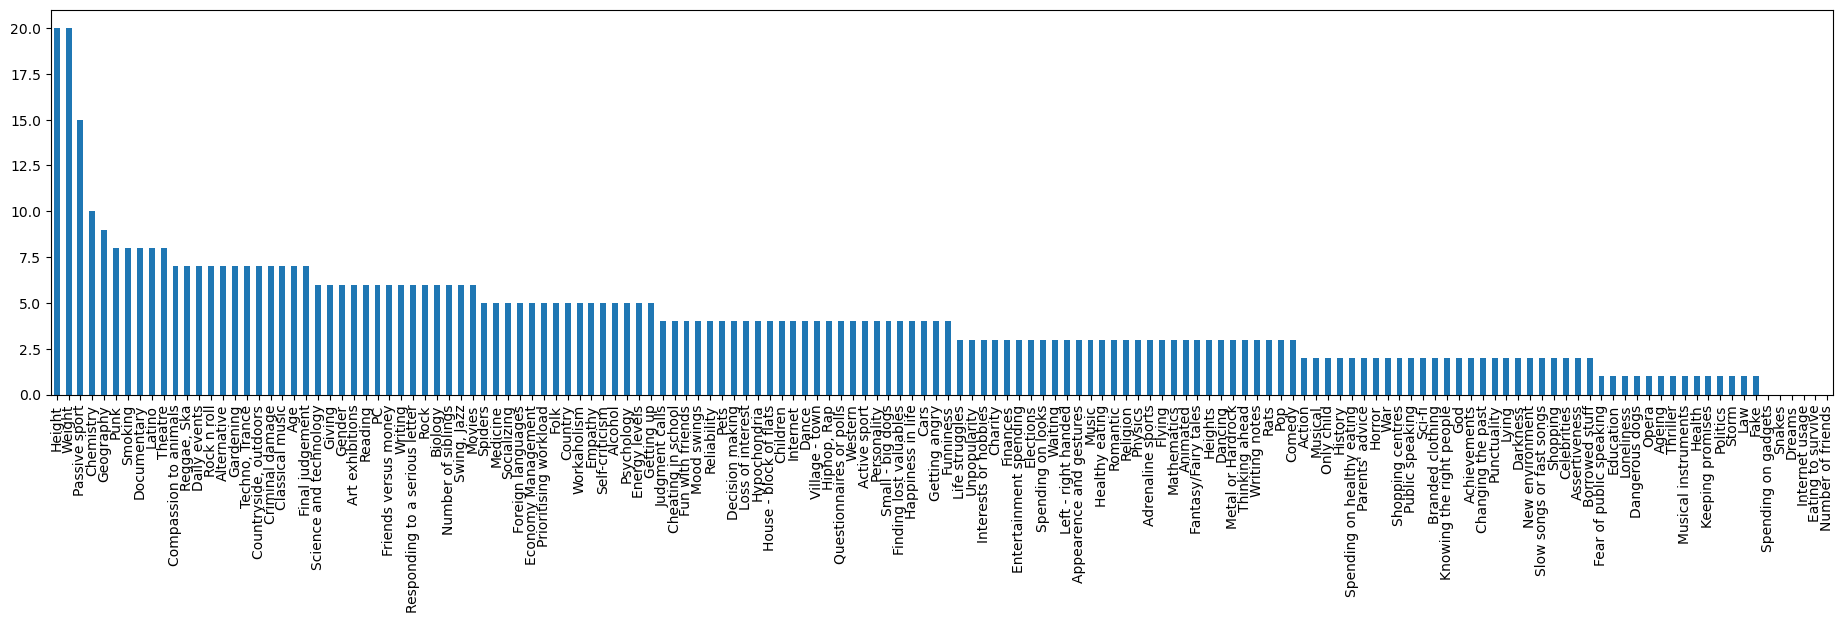

In [6]:
nulls = data.isnull().sum().sort_values(ascending=False)
nulls.plot(kind='bar', figsize=(23, 5))

In [7]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Music                     1007 non-null   float64
 1   Slow songs or fast songs  1008 non-null   float64
 2   Movies                    1004 non-null   float64
 3   History                   1008 non-null   float64
 4   Psychology                1005 non-null   float64
 5   Politics                  1009 non-null   float64
 6   Mathematics               1007 non-null   float64
 7   Science and technology    1004 non-null   float64
 8   Reading                   1004 non-null   float64
 9   Foreign languages         1005 non-null   float64
 10  Religion                  1007 non-null   float64
 11  Passive sport             995 non-null    float64
 12  Active sport              1006 non-null   float64
 13  Fun with friends          1006 non-null   float64
 14  Smoking 

In [11]:
# saving the dataframe
myData.to_csv('myData.csv')

myData.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Politics  \
0    5.0                       3.0     5.0      1.0         5.0       1.0   
1    4.0                       4.0     5.0      1.0         3.0       4.0   
2    5.0                       5.0     5.0      1.0         2.0       1.0   
3    5.0                       3.0     5.0      4.0         4.0       5.0   
4    5.0                       3.0     5.0      3.0         2.0       3.0   

   Mathematics  Science and technology  Reading  Foreign languages  Religion  \
0          3.0                     4.0      3.0                5.0       1.0   
1          5.0                     3.0      4.0                5.0       1.0   
2          5.0                     2.0      5.0                5.0       5.0   
3          4.0                     3.0      5.0                4.0       4.0   
4          2.0                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  Fun with friends        Smoking  \
0            1.0           5.0               5.0   never smoked   
1            1.0           1.0               4.0   never smoked   
2            5.0           2.0               5.0  tried smoking   
3            1.0           1.0               2.0  former smoker   
4            3.0           1.0               4.0  tried smoking   

          Alcohol  Writing notes  Thinking ahead  Keeping promises  \
0     drink a lot            5.0             2.0               4.0   
1     drink a lot            4.0             4.0               4.0   
2     drink a lot            5.0             5.0               5.0   
3     drink a lot            4.0             3.0               4.0   
4  social drinker            2.0             5.0               4.0   

   Loss of interest  Friends versus money  Funniness  Fake  Empathy  \
0               1.0                   3.0        5.0   1.0      3.0   
1               3.0                   4.0        3.0   2.0      2.0   
2               1.0                   5.0        2.0   4.0      5.0   
3               5.0                   2.0        1.0   1.0      3.0   
4               2.0                   3.0        3.0   2.0      3.0   

   Compassion to animals  God  Number of friends  \
0                    5.0  1.0                  3   
1                    4.0  1.0                  3   
2                    4.0  5.0                  3   
3                    2.0  4.0                  1   
4                    3.0  5.0                  3   

                           Lying  Achievements  Happiness in life  \
0                          never           4.0                4.0   
1                      sometimes           2.0                4.0   
2                      sometimes           3.0                4.0   
3  only to avoid hurting someone           3.0                2.0   
4          everytime it suits me           3.0                3.0   

   Interests or hobbies  Finances   Age  Number of siblings  \
0                   3.0       3.0  20.0                 1.0   
1                   3.0       3.0  19.0                 2.0   
2                   5.0       2.0  20.0                 2.0   
3                   NaN       2.0  22.0                 1.0   
4                   3.0       4.0  20.0                 1.0   

                 Education Village - town  
0  college/bachelor degree        village  
1  college/bachelor degree           city  
2         secondary school           city  
3  college/bachelor degree           city  
4         secondary school        village

In [11]:
columnsList = myData.columns[myData.isna().any()].tolist()
print(columnsList)

['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology', 'Politics', 'Mathematics', 'Science and technology', 'Reading', 'Foreign languages', 'Religion', 'Passive sport', 'Active sport', 'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes', 'Thinking ahead', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake', 'Empathy', 'Compassion to animals', 'God', 'Lying', 'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances', 'Age', 'Number of siblings', 'Education', 'Village - town']


### Convert all values to numerical values.

In [12]:
# 5 objects
print("Alcohol: "+str(myData['Alcohol'].unique()))
print("Smoking: "+str(myData['Smoking'].unique()))
print("Lying: "+str(myData['Lying'].unique()))
print("Education: "+str(myData['Education'].unique()))
print("Village - Town: "+str(myData['Village - town'].unique()))

Alcohol: ['drink a lot' 'social drinker' 'never' nan]
Smoking: ['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan]
Lying: ['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan]
Education: ['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
Village - Town: ['village' 'city' nan]


In [13]:
myData['Alcohol'].replace(['never', 'social drinker', 'drink a lot'], [0, 3, 5],inplace=True)
myData['Smoking'].replace(['never smoked', 'tried smoking', 'current smoker', 'former smoker'], [0, 3, 4, 5],inplace=True)
myData['Lying'].replace(['never', 'sometimes', 'only to avoid hurting someone', 'everytime it suits me'], [0, 3, 4, 5],inplace=True)
myData['Education'].replace(['currently a primary school pupil', 'primary school', 'secondary school', 'college/bachelor degree', 'masters degree', 'doctorate degree'], [0, 1, 2, 3, 4, 5],inplace=True)
myData['Village - town'].replace(['village', 'city'], [5, 0],inplace=True)

### Fill missing values with median, categorical data, median is okay

In [14]:
for column in columnsList:
    print("Median value for " + column + " is " + str(myData[column].median()))
    myData[column].fillna(myData[column].median(),inplace=True)
myData.isna().sum()

Median value for Music is 5.0
Median value for Slow songs or fast songs is 3.0
Median value for Movies is 5.0
Median value for History is 3.0
Median value for Psychology is 3.0
Median value for Politics is 2.0
Median value for Mathematics is 2.0
Median value for Science and technology is 3.0
Median value for Reading is 3.0
Median value for Foreign languages is 4.0
Median value for Religion is 2.0
Median value for Passive sport is 3.0
Median value for Active sport is 3.0
Median value for Fun with friends is 5.0
Median value for Smoking is 3.0
Median value for Alcohol is 3.0
Median value for Writing notes is 3.0
Median value for Thinking ahead is 3.0
Median value for Keeping promises is 4.0
Median value for Loss of interest is 3.0
Median value for Friends versus money is 4.0
Median value for Funniness is 3.0
Median value for Fake is 2.0
Median value for Empathy is 4.0
Median value for Compassion to animals is 4.0
Median value for God is 3.0
Median value for Lying is 3.0
Median value for 

Music                       0
Slow songs or fast songs    0
Movies                      0
History                     0
Psychology                  0
Politics                    0
Mathematics                 0
Science and technology      0
Reading                     0
Foreign languages           0
Religion                    0
Passive sport               0
Active sport                0
Fun with friends            0
Smoking                     0
Alcohol                     0
Writing notes               0
Thinking ahead              0
Keeping promises            0
Loss of interest            0
Friends versus money        0
Funniness                   0
Fake                        0
Empathy                     0
Compassion to animals       0
God                         0
Number of friends           0
Lying                       0
Achievements                0
Happiness in life           0
Interests or hobbies        0
Finances                    0
Age                         0
Number of 

<AxesSubplot:ylabel='Music'>

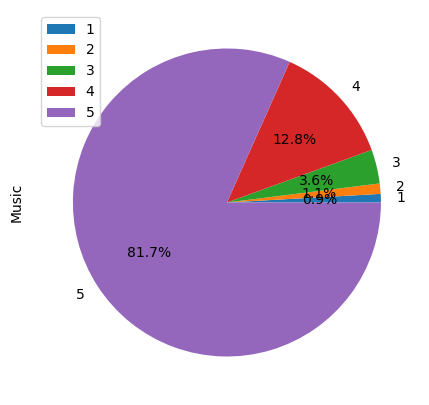

In [22]:
type_counts = myData['Music'].value_counts()
df2 = pd.DataFrame({'Music': type_counts}, 
                     index = [1,2,3,4,5])
df2.plot.pie(y='Music', figsize=(5,5), autopct='%1.1f%%')

In [22]:
myData.fillna(myData.median(),inplace=True)
myData.isna().sum()

Music                       0
Slow songs or fast songs    0
Movies                      0
History                     0
Psychology                  0
Politics                    0
Mathematics                 0
Science and technology      0
Reading                     0
Foreign languages           0
Religion                    0
Passive sport               0
Active sport                0
Fun with friends            0
Smoking                     0
Alcohol                     0
Writing notes               0
Thinking ahead              0
Keeping promises            0
Loss of interest            0
Friends versus money        0
Funniness                   0
Fake                        0
Empathy                     0
Compassion to animals       0
God                         0
Number of friends           0
Lying                       0
Achievements                0
Happiness in life           0
Interests or hobbies        0
Finances                    0
Age                         0
Number of 

In [23]:
myData.describe()

Music  Slow songs or fast songs       Movies      History  \
count  1010.000000               1010.000000  1010.000000  1010.000000   
mean      4.732673                  3.327723     4.615842     3.206931   
std       0.663222                  0.833232     0.693268     1.262304   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     4.000000     2.000000   
50%       5.000000                  3.000000     5.000000     3.000000   
75%       5.000000                  4.000000     5.000000     4.000000   
max       5.000000                  5.000000     5.000000     5.000000   

        Psychology    Politics  Mathematics  Science and technology  \
count  1010.000000  1010.00000  1010.000000             1010.000000   
mean      3.137624     2.59505     2.333663                3.232673   
std       1.255265     1.29395     1.350607                1.278906   
min       1.000000     1.00000     1.000000                1.000000   
25%       2.000000     1.00000     1.000000                2.000000   
50%       3.000000     2.00000     2.000000                3.000000   
75%       4.000000     4.00000     3.000000                4.000000   
max       5.000000     5.00000     5.000000                5.000000   

           Reading  Foreign languages     Religion  Passive sport  \
count  1010.000000        1010.000000  1010.000000    1010.000000   
mean      3.158416           3.779208     2.272277       3.382178   
std       1.491520           1.138463     1.317761       1.395334   
min       1.000000           1.000000     1.000000       1.000000   
25%       2.000000           3.000000     1.000000       2.000000   
50%       3.000000           4.000000     2.000000       3.000000   
75%       5.000000           5.000000     3.000000       5.000000   
max       5.000000           5.000000     5.000000       5.000000   

       Active sport  Fun with friends      Smoking      Alcohol  \
count   1010.000000       1010.000000  1010.000000  1010.000000   
mean       3.290099          4.559406     2.915842     3.071287   
std        1.501239          0.736245     1.652054     1.407494   
min        1.000000          2.000000     0.000000     0.000000   
25%        2.000000          4.000000     3.000000     3.000000   
50%        3.000000          5.000000     3.000000     3.000000   
75%        5.000000          5.000000     4.000000     3.000000   
max        5.000000          5.000000     5.000000     5.000000   

       Writing notes  Thinking ahead  Keeping promises  Loss of interest  \
count    1010.000000     1010.000000       1010.000000       1010.000000   
mean        3.083168        3.412871          3.987129          2.709901   
std         1.406136        1.135442          0.898646          1.351137   
min         1.000000        1.000000          1.000000          1.000000   
25%         2.000000        3.000000          3.000000          2.000000   
50%         3.000000        3.000000          4.000000          3.000000   
75%         4.000000        4.000000          5.000000          4.000000   
max         5.000000        5.000000          5.000000          5.000000   

       Friends versus money    Funniness         Fake      Empathy  \
count           1010.000000  1010.000000  1010.000000  1010.000000   
mean               3.780198     3.292079     2.130693     3.859406   
std                1.121554     1.126682     1.046372     1.128966   
min                1.000000     1.000000     1.000000     1.000000   
25%                3.000000     3.000000     1.000000     3.000000   
50%                4.000000     3.000000     2.000000     4.000000   
75%                5.000000     4.000000     3.000000     5.000000   
max                5.000000     5.000000     5.000000     5.000000   

       Compassion to animals         God  Number of friends        Lying  \
count            1010.000000  1010.00000        1010.000000  1010.000000   
mean        

In [24]:
columns=pd.read_csv('columns.csv')
columns.loc[columns['short'].isin(myColumns)].reset_index(drop=True)

original  \
0                         I enjoy listening to music.   
1                                           I prefer.   
2                     I really enjoy watching movies.   
3                                             History   
4                                          Psychology   
5                                            Politics   
6                                         Mathematics   
7                                      Poetry reading   
8                                   Foreign languages   
9                                            Religion   
10                       Sport and leisure activities   
11                         Sport at competitive level   
12                             Science and technology   
13                                        Socializing   
14                                     Smoking habits   
15                                           Drinking   
16   I always make a list so I don't forget anything.   
17  I look at things from all different angles bef...   
18                         I always keep my promises.   
19  I can fall for someone very quickly and then c...   
20  I would rather have lots of friends than lots ...   
21               I always try to be the funniest one.   
22                      I can be two faced sometimes.   
23                            I am emphatetic person.   
24             I don't like seeing animals suffering.   
25                                  I believe in God.   
26                            I have lots of friends.   
27                              Do you lie to others?   
28  I always let other people know about my achiev...   
29                      I am 100% happy with my life.   
30       I have many different hobbies and interests.   
31                        I save all the money I can.   
32                                                Age   
33                     How many siblings do you have?   
34                         Highest education achieved   
35                  I spent most of my childhood in a   

                       short  
0                      Music  
1   Slow songs or fast songs  
2                     Movies  
3                    History  
4                 Psychology  
5                   Politics  
6                Mathematics  
7                    Reading  
8          Foreign languages  
9                   Religion  
10             Passive sport  
11              Active sport  
12    Science and technology  
13          Fun with friends  
14                   Smoking  
15                   Alcohol  
16             Writing notes  
17            Thinking ahead  
18          Keeping promises  
19          Loss of interest  
20      Friends versus money  
21                 Funniness  
22                      Fake  
23                   Empathy  
24     Compassion to animals  
25                       God  
26         Number of friends  
27                     Lying  
28              Achievements  
29         Happiness in life  
30      Interests or hobbies  
31                  Finances  
32                       Age  
33        Number of siblings  
34                 Education  
35            Village - town

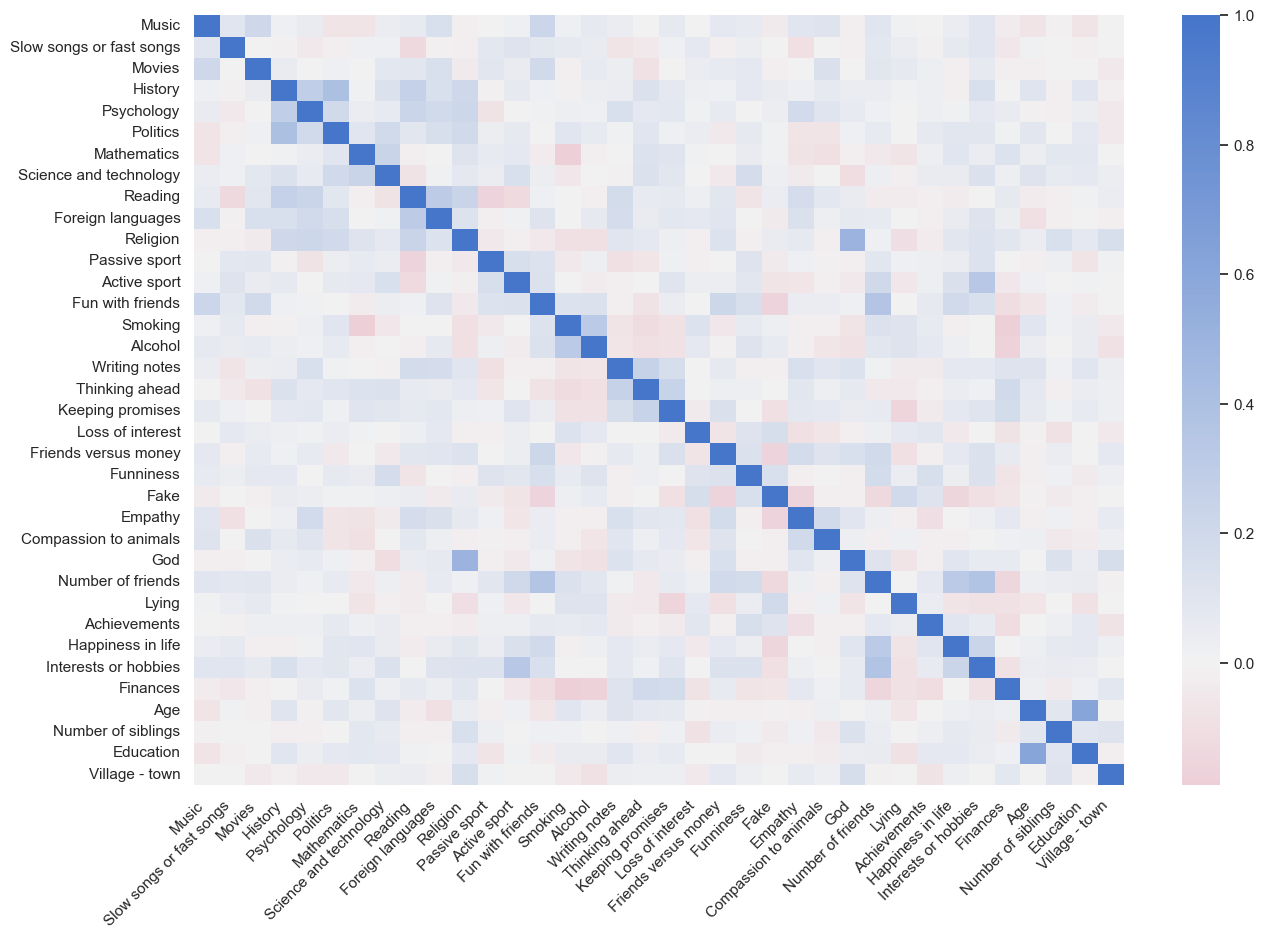

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.heatmap(myData.corr(), center=0.00, cmap=sns.diverging_palette(0, 255,as_cmap=True))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [26]:
myData.columns

Index(['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology',
       'Politics', 'Mathematics', 'Science and technology', 'Reading',
       'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
       'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes',
       'Thinking ahead', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Empathy',
       'Compassion to animals', 'God', 'Number of friends', 'Lying',
       'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances',
       'Age', 'Number of siblings', 'Education', 'Village - town'],
      dtype='object')

In [27]:
newData = myData[['God', 'Religion', 'Age', 'Education', 'History', 'Politics', 'Number of friends', 'Fun with friends']]

newData2 = myData[['God', 'Religion', 'Age', 'Education', 'History', 'Politics', 'Number of friends', 'Fun with friends', 'Interests or hobbies', 'Psychology', 'Happiness in life']]

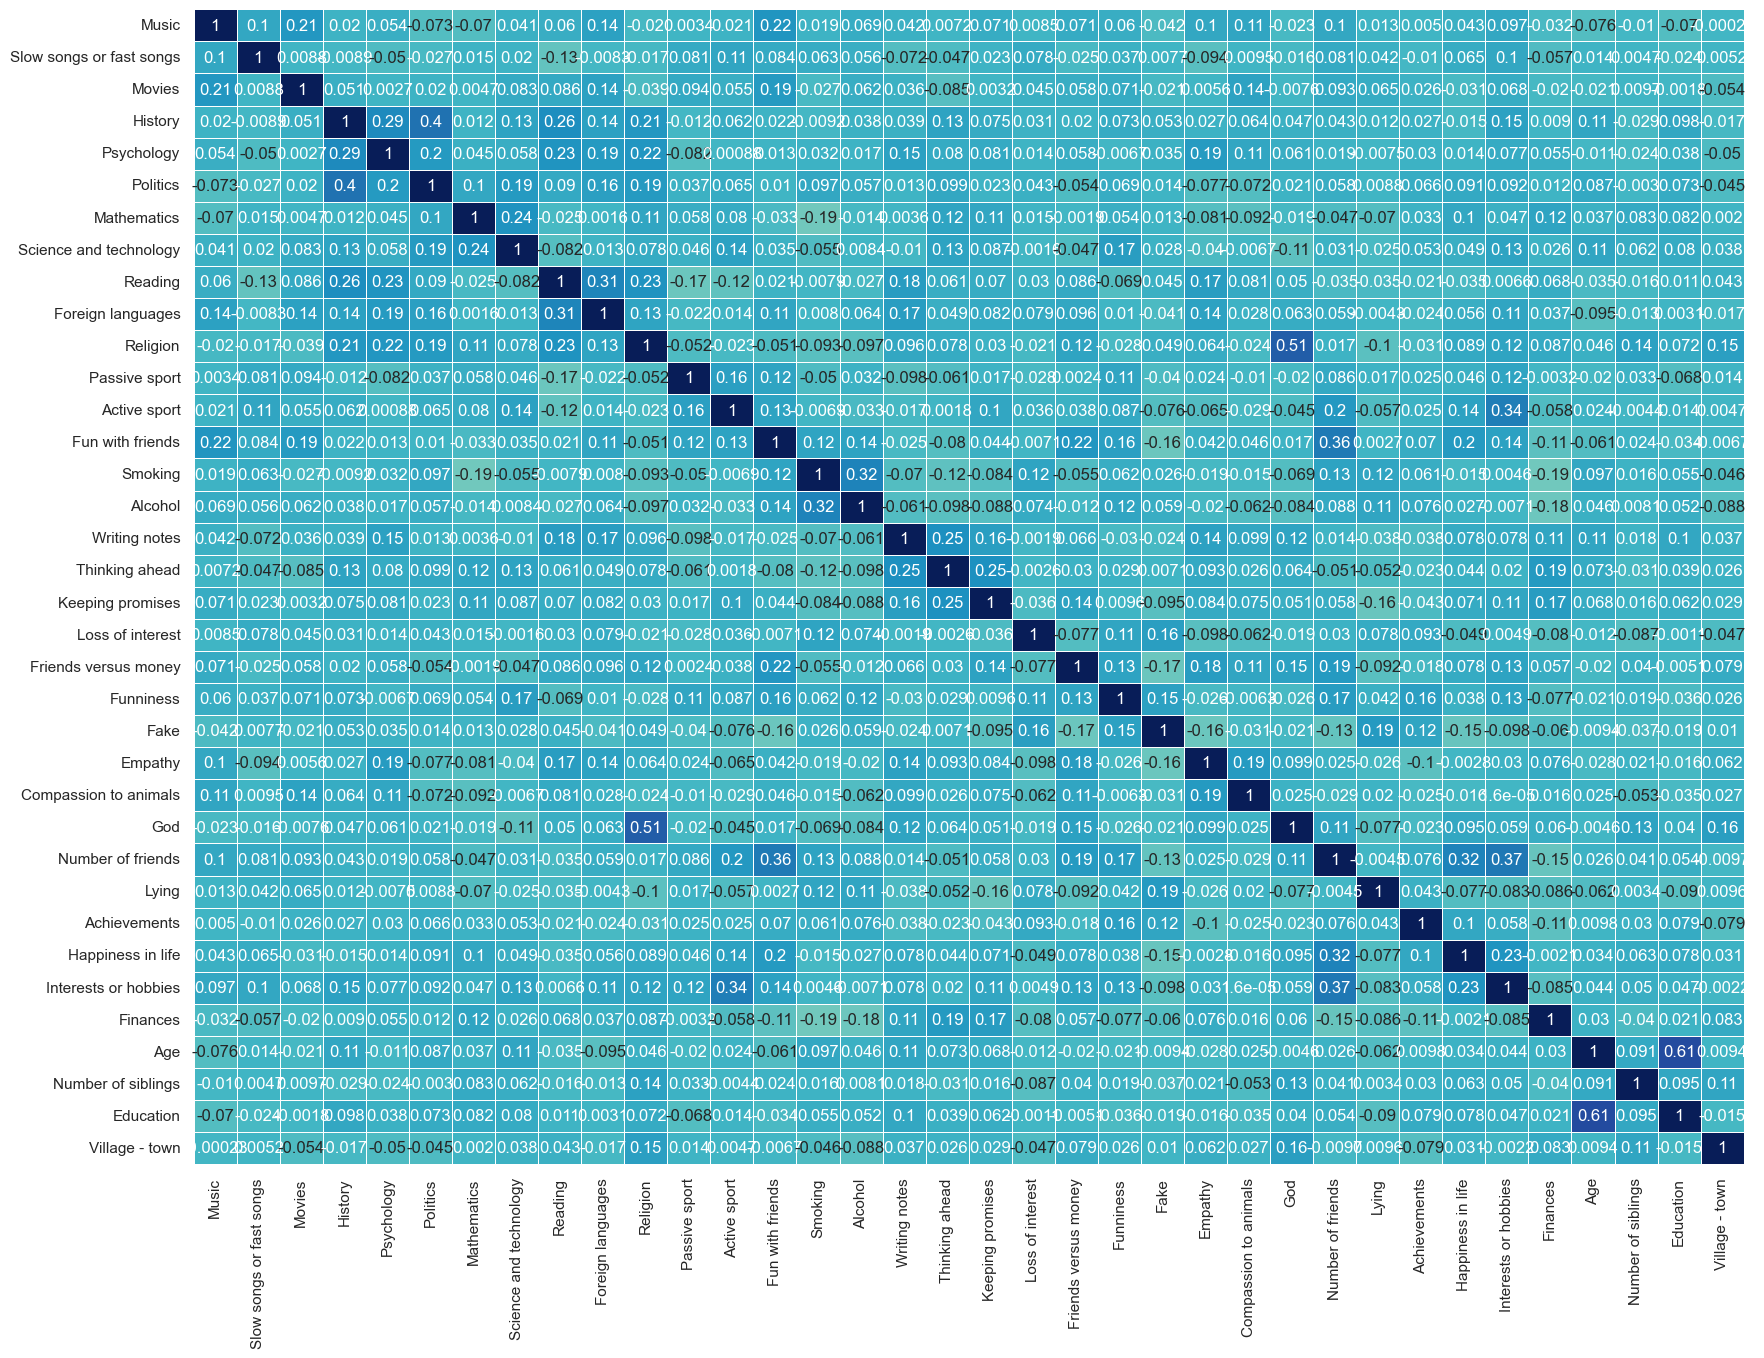

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(myData.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [29]:
myData=myData.drop(columns=['God', 'Village - town'])

<AxesSubplot:xlabel='Smoking', ylabel='Finances'>

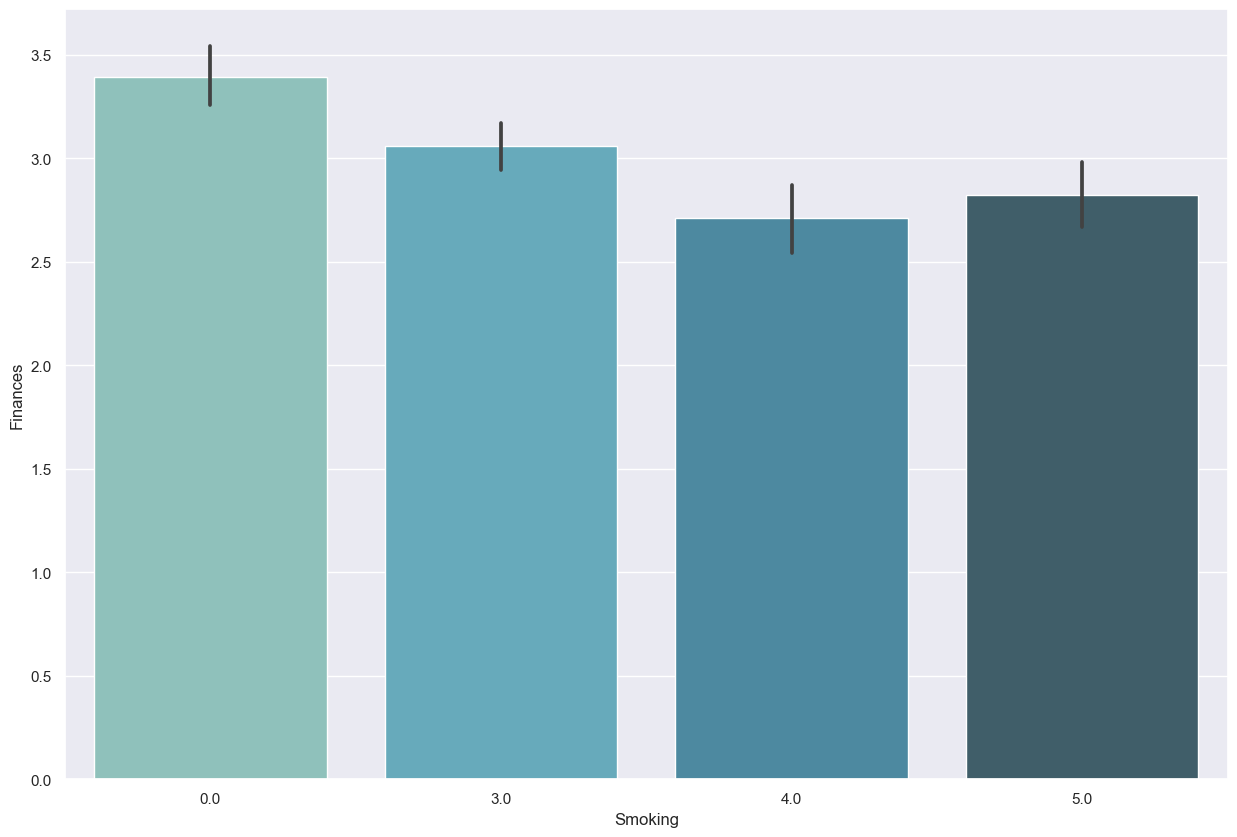

In [31]:
sns.barplot(x=myData['Smoking'], y=myData['Finances'], palette="GnBu_d")


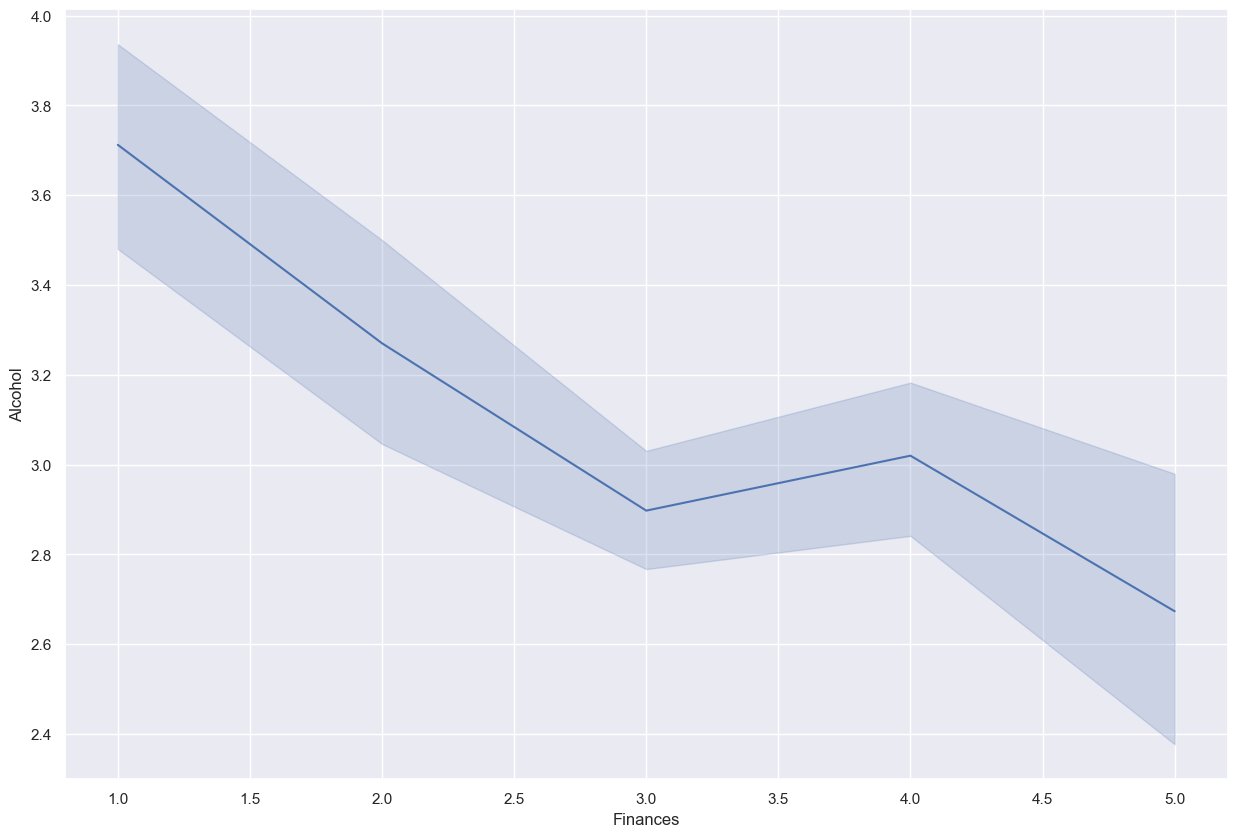

In [35]:
sns.lineplot(x = myData['Finances'], y=myData['Alcohol'], palette="GnBu_d");


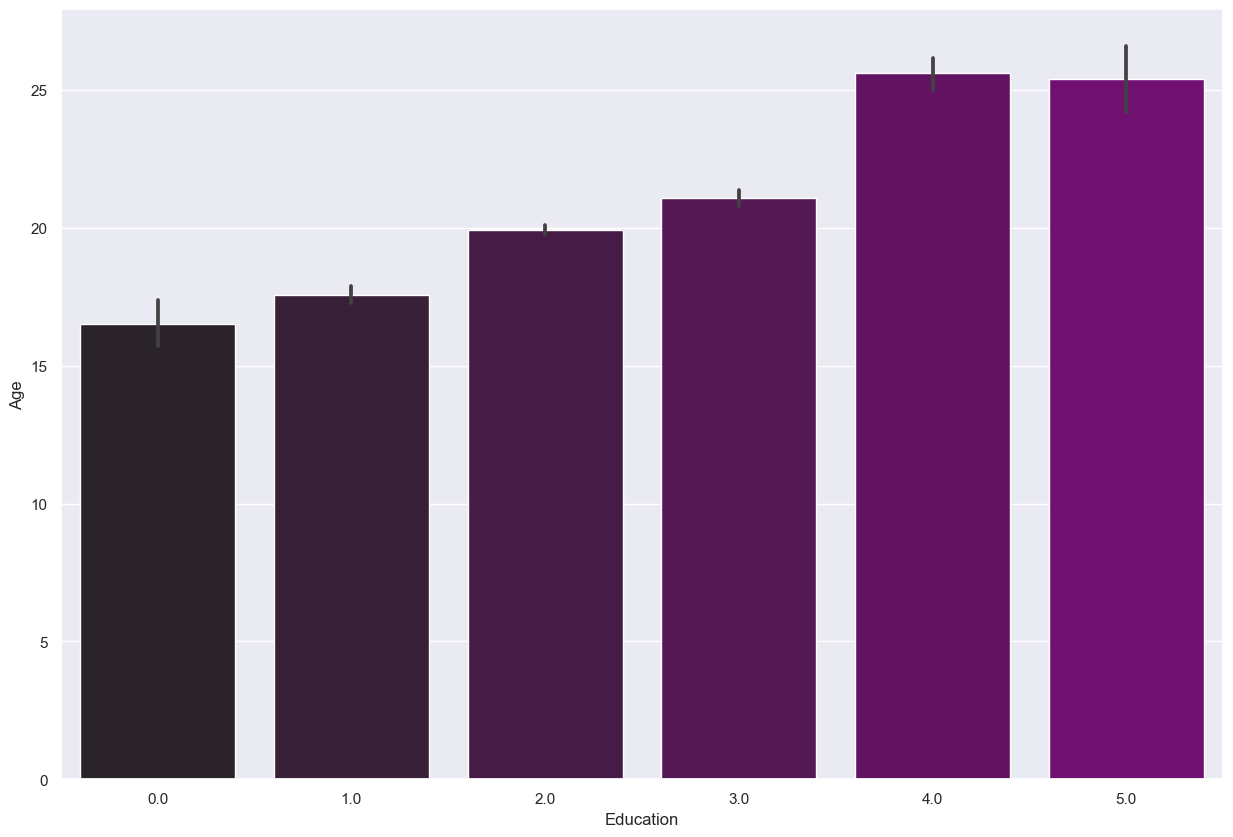

In [15]:
sns.barplot(x=myData['Education'], y=myData['Age'], palette=sns.dark_palette("purple"));


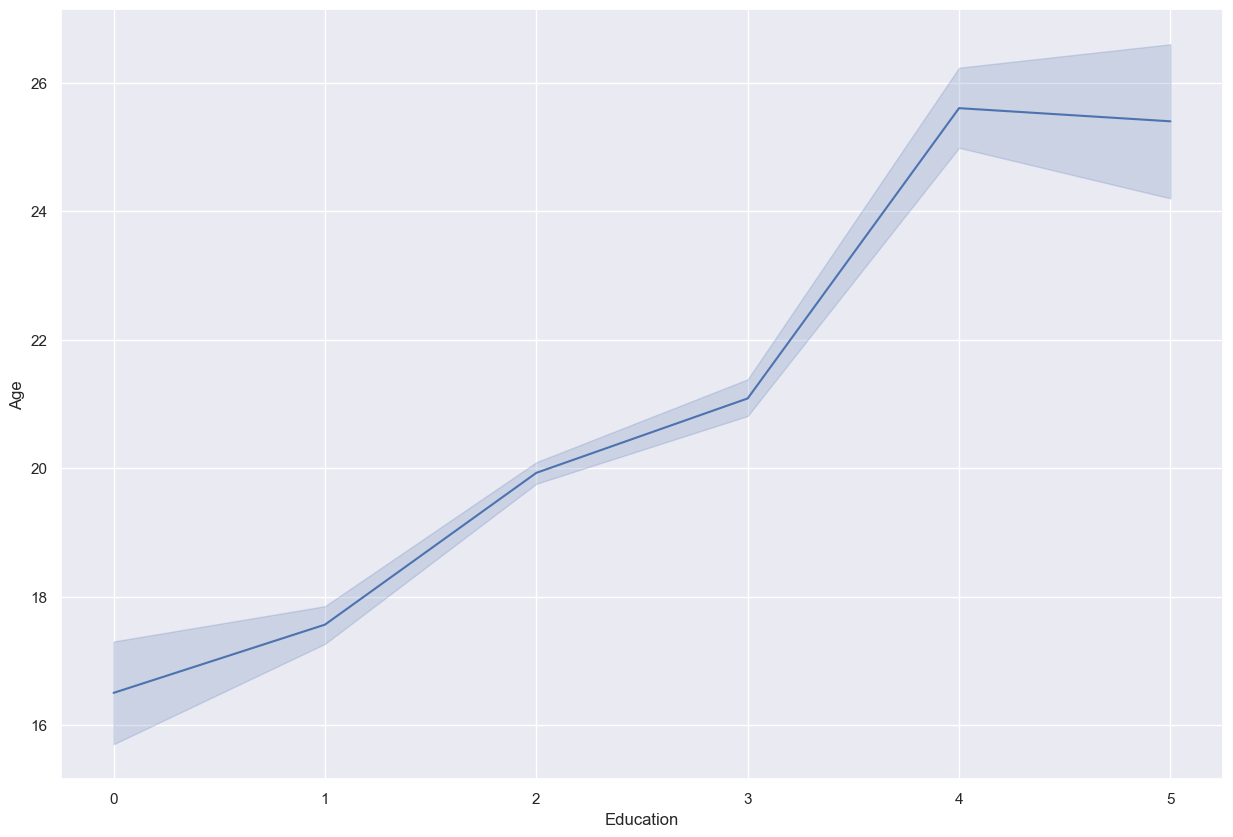

In [16]:
sns.lineplot(x=myData['Education'], y=myData['Age'], palette=sns.dark_palette("purple"));

## Clustering

### Helper functions

In [32]:
def printClustersPCA(dataset_, model_, labels_):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataset_.iloc[:, 0], dataset_.iloc[:, 1], dataset_.iloc[:, 2], 
            c=labels_, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


    ax.set_title("First three PCA directions")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.dist = 10

    ax.scatter(model_.cluster_centers_[:,0], model_.cluster_centers_[:,1], 
           model_.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

    plt.autoscale(enable=True, axis='x', tight=True)    

    plt.show()

In [33]:
def printClusters(dataset_, labels_, indices_=[0, 1, 2]):
    plt.figure(figsize = (12, 12))
    ax = plt.axes(projection='3d')
    for cluster in set(labels_):
        cluster_mask = [elem == cluster for elem in labels_]
        
        zdata = dataset_.iloc[cluster_mask, indices_[0]]
        xdata = dataset_.iloc[cluster_mask, indices_[1]]
        ydata = dataset_.iloc[cluster_mask, indices_[2]]
        ax.scatter3D(xdata, ydata, zdata)
        
        ax.set_xlabel(dataset_.columns[indices_[0]])
        ax.set_ylabel(dataset_.columns[indices_[1]])
        ax.set_zlabel(dataset_.columns[indices_[2]])

In [34]:
def printDataByClusters(dataset_, labels_):
    dataset_copy = dataset_.copy()
    dataset_copy['label'] = labels_

    df_mean = (dataset_copy.groupby('label').mean())
    results = pd.DataFrame(columns=['Variable', 'Var'])

    for column in df_mean.columns:
        results.loc[len(results), :] = [column, np.var(df_mean[column])]
        selected_columns = list(results.sort_values('Var', ascending=False).head(10).Variable.values)
    
    selected1 = []
    selected2 = []
    
    for col in selected_columns:
        if dataset_[col].max() > 1000:
            selected1.append(col)
        else:
            selected2.append(col)
    
    selected1.append("label")
    selected2.append("label")
    
    tidy1 = dataset_copy[selected1].melt(id_vars='label')
    tidy2 = dataset_copy[selected2].melt(id_vars='label')
    
    fig, axs = plt.subplots(1, 2, figsize=(18, 7), squeeze=False)
    sns.barplot(x='label', y='value', hue='variable', data=tidy1, ax = axs[0][0])
    sns.barplot(x='label', y='value', hue='variable', data=tidy2, ax = axs[0][1])
    plt.tight_layout()    
    plt.show()

In [35]:
myData.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Politics  \
0    5.0                       3.0     5.0      1.0         5.0       1.0   
1    4.0                       4.0     5.0      1.0         3.0       4.0   
2    5.0                       5.0     5.0      1.0         2.0       1.0   
3    5.0                       3.0     5.0      4.0         4.0       5.0   
4    5.0                       3.0     5.0      3.0         2.0       3.0   

   Mathematics  Science and technology  Reading  Foreign languages  Religion  \
0          3.0                     4.0      3.0                5.0       1.0   
1          5.0                     3.0      4.0                5.0       1.0   
2          5.0                     2.0      5.0                5.0       5.0   
3          4.0                     3.0      5.0                4.0       4.0   
4          2.0                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  Fun with friends  Smoking  Alcohol  \
0            1.0           5.0               5.0      0.0      5.0   
1            1.0           1.0               4.0      0.0      5.0   
2            5.0           2.0               5.0      3.0      5.0   
3            1.0           1.0               2.0      5.0      5.0   
4            3.0           1.0               4.0      3.0      3.0   

   Writing notes  Thinking ahead  Keeping promises  Loss of interest  \
0            5.0             2.0               4.0               1.0   
1            4.0             4.0               4.0               3.0   
2            5.0             5.0               5.0               1.0   
3            4.0             3.0               4.0               5.0   
4            2.0             5.0               4.0               2.0   

   Friends versus money  Funniness  Fake  Empathy  Compassion to animals  \
0                   3.0        5.0   1.0      3.0                    5.0   
1                   4.0        3.0   2.0      2.0                    4.0   
2                   5.0        2.0   4.0      5.0                    4.0   
3                   2.0        1.0   1.0      3.0                    2.0   
4                   3.0        3.0   2.0      3.0                    3.0   

   Number of friends  Lying  Achievements  Happiness in life  \
0                  3    0.0           4.0                4.0   
1                  3    3.0           2.0                4.0   
2                  3    3.0           3.0                4.0   
3                  1    4.0           3.0                2.0   
4                  3    5.0           3.0                3.0   

   Interests or hobbies  Finances   Age  Number of siblings  Education  
0                   3.0       3.0  20.0                 1.0        3.0  
1                   3.0       3.0  19.0                 2.0        3.0  
2                   5.0       2.0  20.0                 2.0        2.0  
3                   4.0       2.0  22.0                 1.0        3.0  
4                   3.0       4.0  20.0                 1.0        2.0

### K-means clustering

### myData K-means

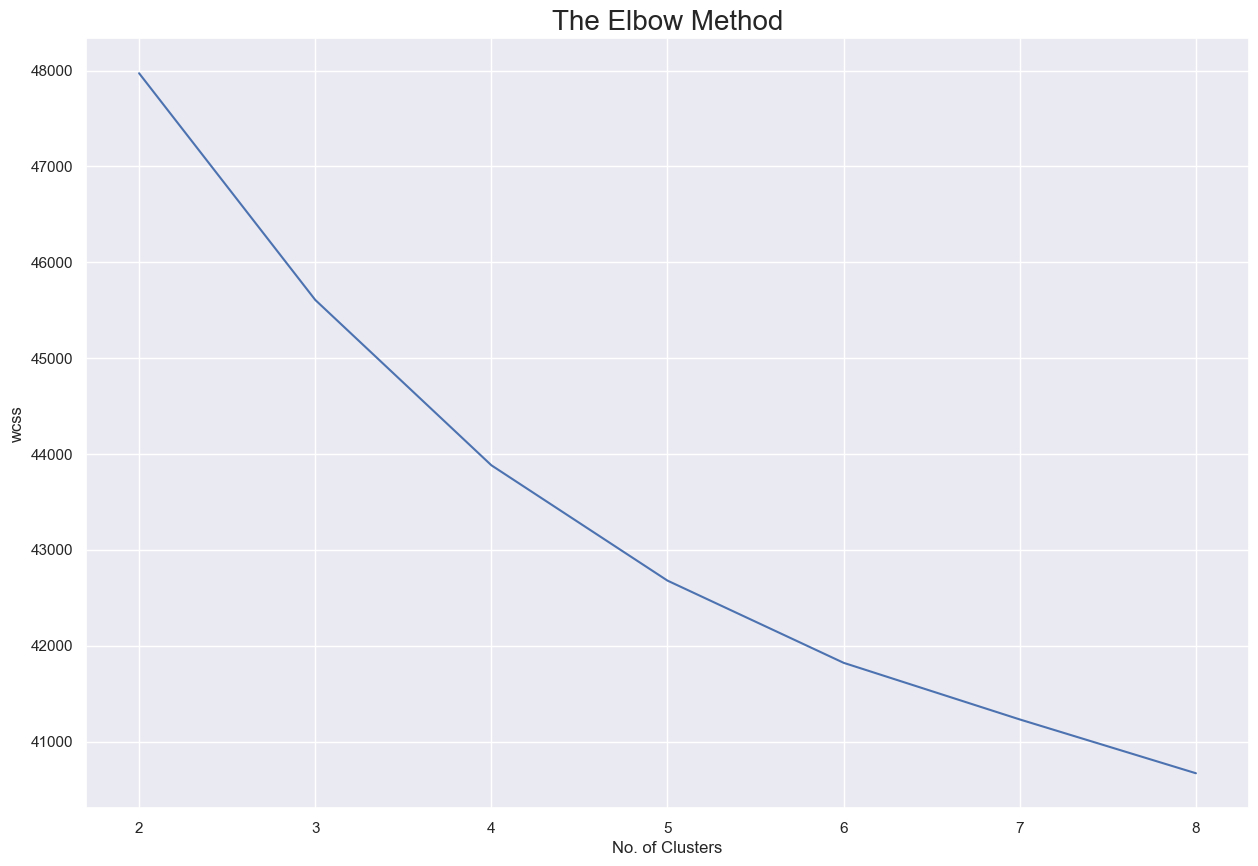

In [36]:
x=myData
wcss = []
for i in range(2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()



### newData K-means

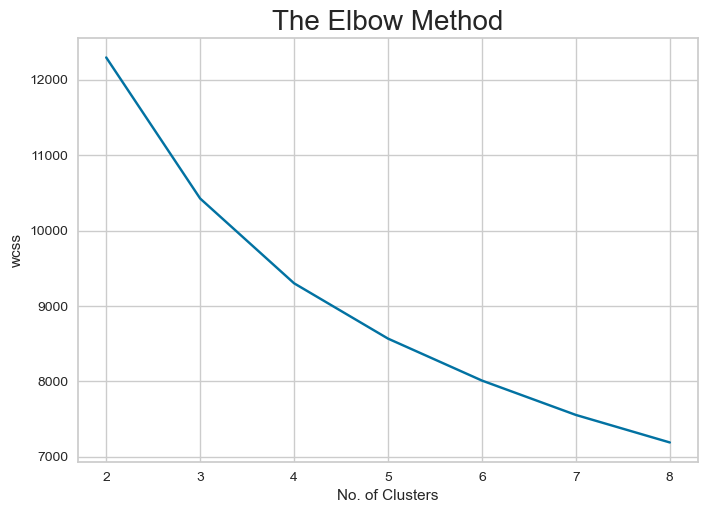

In [72]:
x=newData
wcss = []
for i in range(2, 9):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 3000, n_init = 10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 9), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [73]:
# znaci sutra radim sistem ili brisem sve pajtone zauvek ne mogu milion verzija istih programa vise
kl = KneeLocator( range(2, 9), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [74]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30)
km.fit(x)
y_means=km.predict(x)

### Calculating Silhouette score

In [75]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette score: ", silhouette_score(x,y_means))
print("Davies-Bouldin score: ", davies_bouldin_score(x,y_means))


Silhouette score:  0.17281636492509017
Davies-Bouldin score:  1.580811833859145


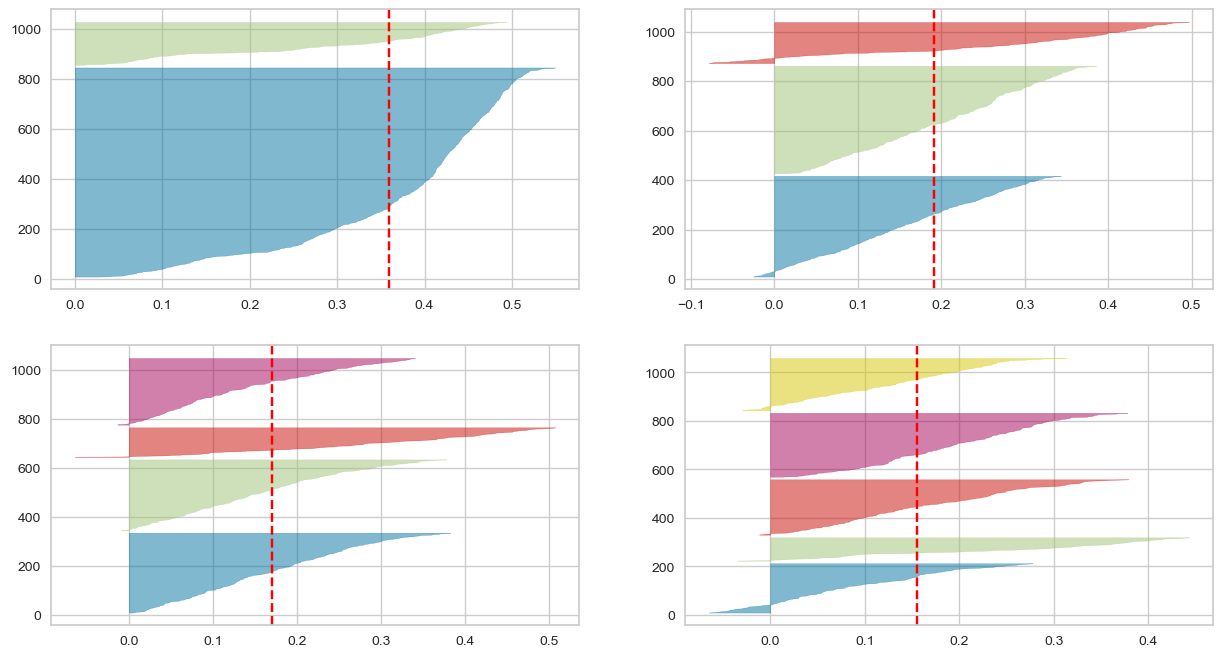

In [76]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

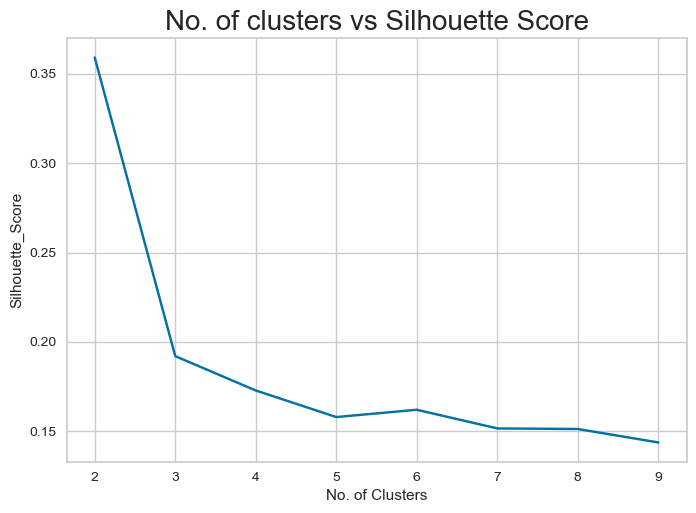

In [77]:
#x=myData[['Science and technology', 'Religion', 'Fun with friends']]
x=newData

scaler=StandardScaler()
scaler.fit(x)
wcss = []
#x=scaler.transform(x)
for i in range(2, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10,random_state=0)
    km.fit(x)
    y_means=km.predict(x)
    s=silhouette_score(x,y_means)
    wcss.append(s)
plt.plot(range(2, 10), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

In [78]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 1000, n_init = 30,random_state=2)
km.fit(x)
y_means=km.predict(x)
cent = km.cluster_centers_
myData['y_means']=y_means
myData.groupby('y_means').mean()
kmeans=pd.DataFrame(y_means)

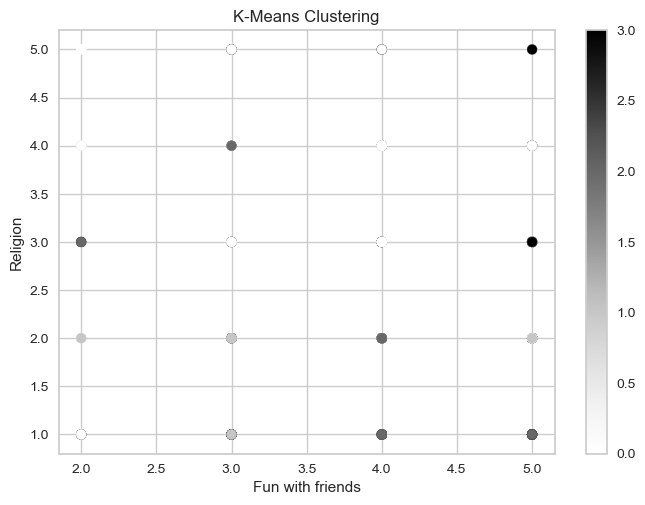

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(newData['Fun with friends'],newData['Religion'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Fun with friends')
ax.set_ylabel('Religion')
plt.colorbar(scatter)

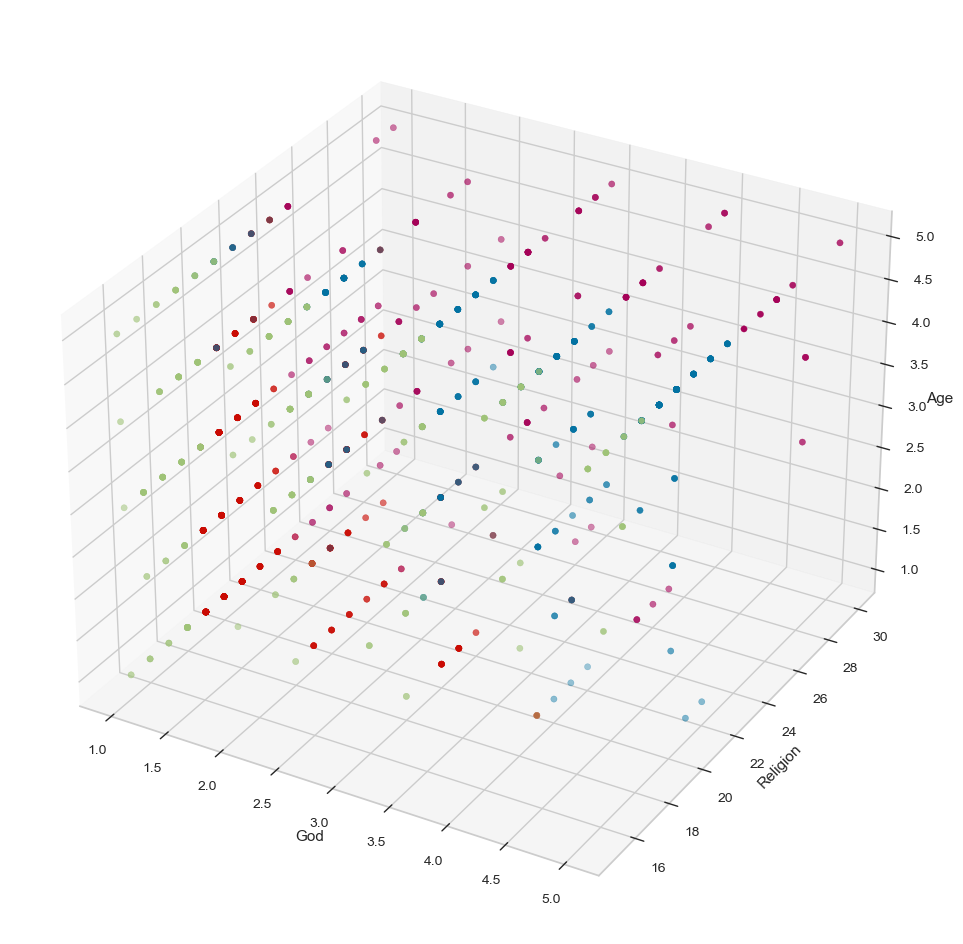

In [83]:
printClusters(newData, y_means)# [0, 3, 6])


In [ ]:
printDataByClusters(newData, y_means)

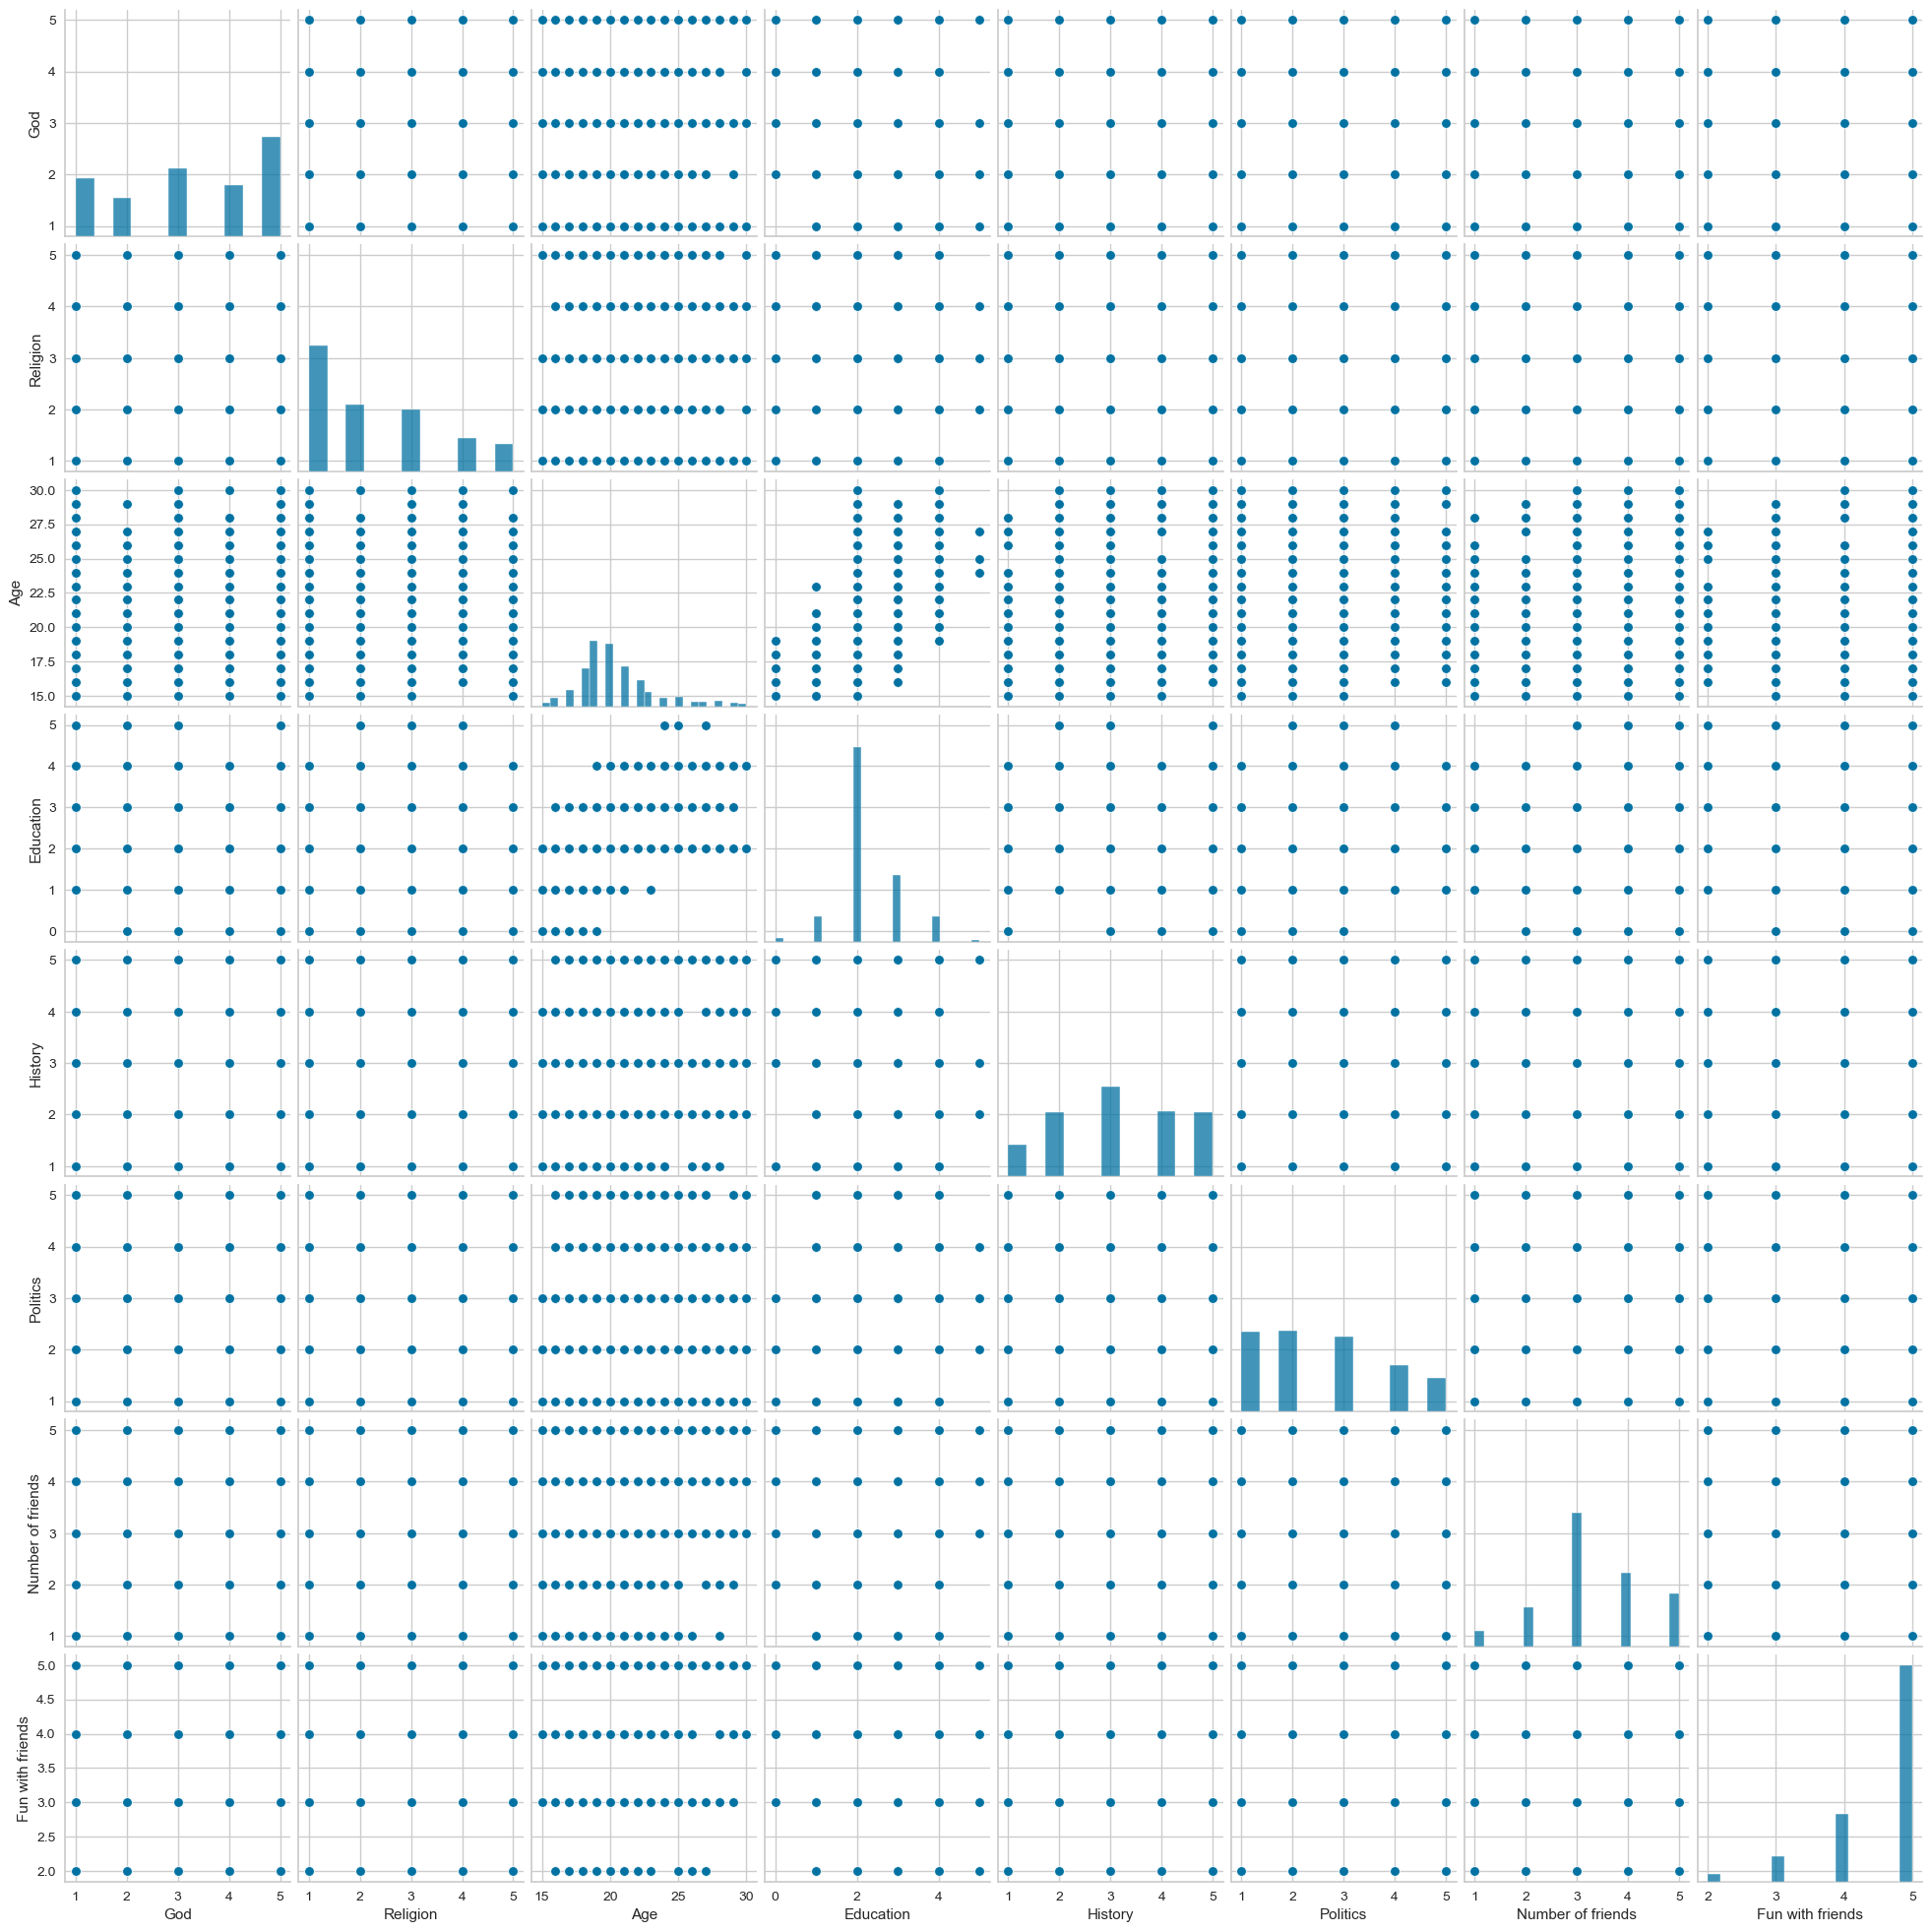

In [84]:
sns.pairplot(x)

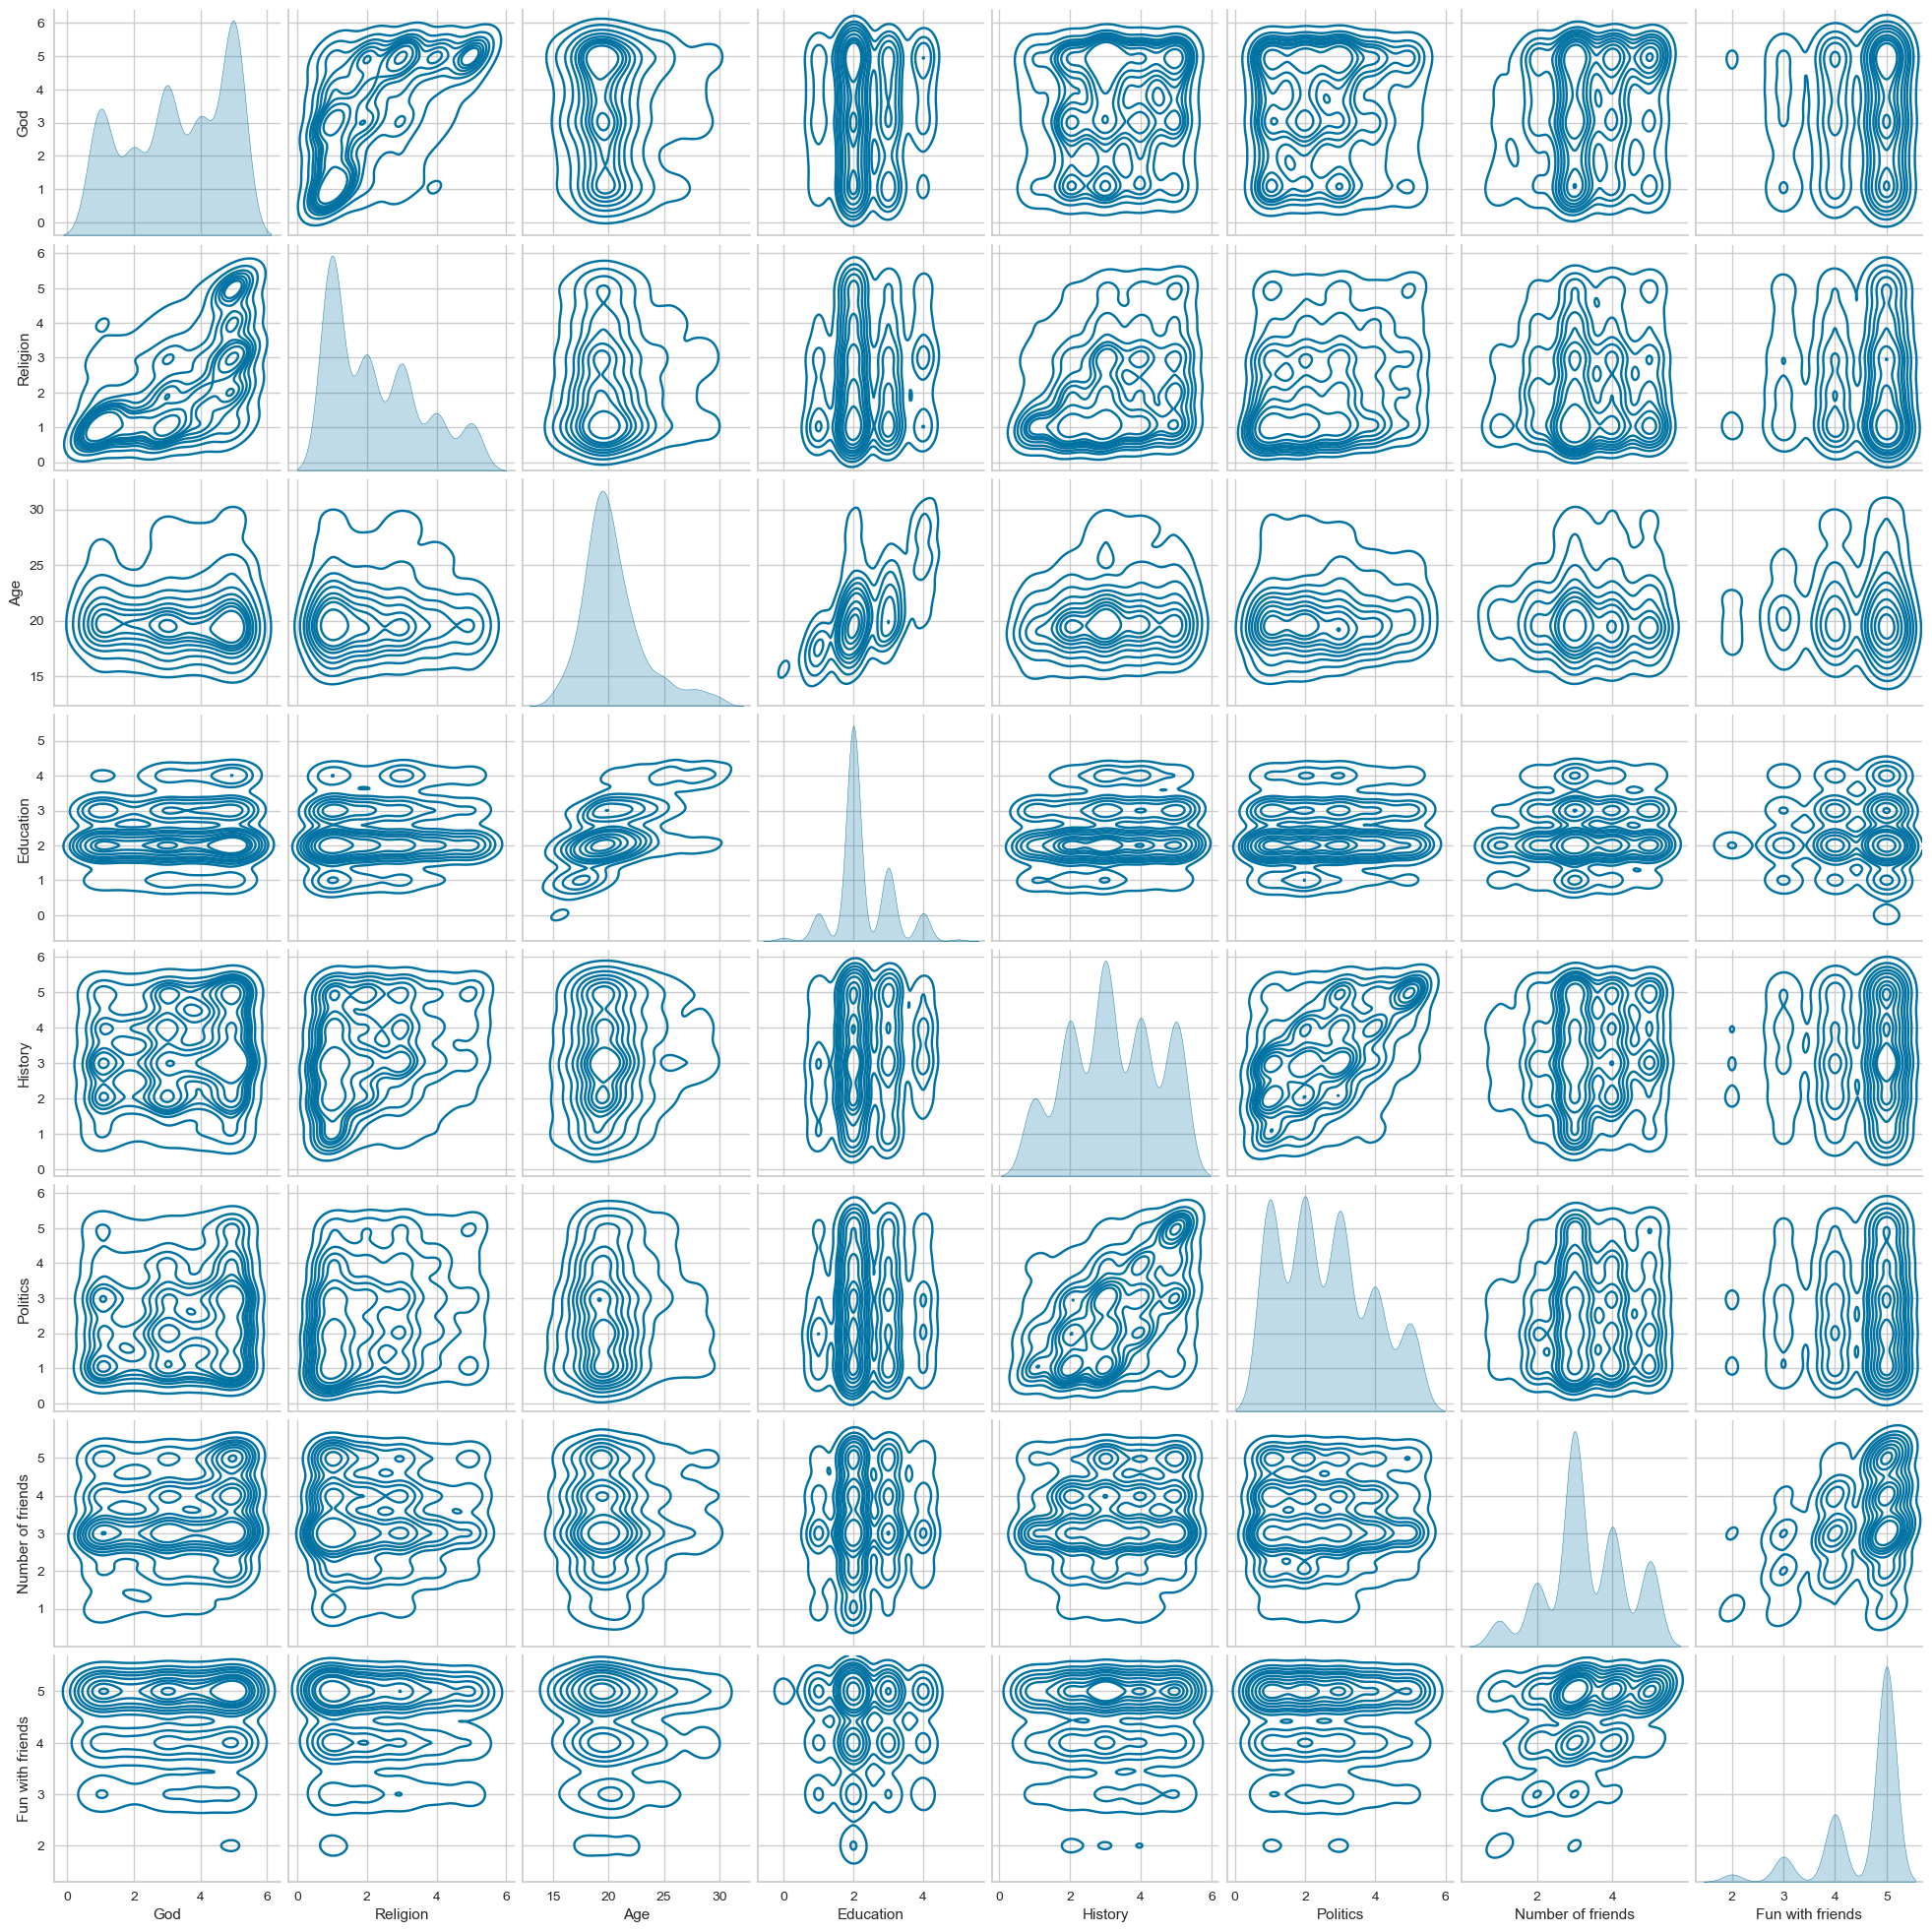

In [54]:
sns.pairplot(newData, kind="kde")

### Aglomerative Clustering

In [85]:
from sklearn.cluster import AgglomerativeClustering

best_score = 0.0
best_ac_labels = None

for k in range(2, 8):
    ac_model = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    ac_labels = ac_model.fit_predict(newData)
    
    sil_score = silhouette_score(newData, ac_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_ac_labels = ac_labels
    
    print("Clusters: ", k)
    print(ac_labels)
    print("Silhouette score: ", silhouette_score(newData, ac_labels))
    print("Davies-Bouldin score: ", davies_bouldin_score(newData, ac_labels))
    print("------------------------------------------")

Clusters:  2
[1 1 1 ... 1 0 1]
Silhouette score:  0.2479672737462213
Davies-Bouldin score:  1.5207009161140586
------------------------------------------
Clusters:  3
[0 0 0 ... 0 2 0]
Silhouette score:  0.17269343808286894
Davies-Bouldin score:  1.6827731370830294
------------------------------------------
Clusters:  4
[3 3 1 ... 3 2 3]
Silhouette score:  0.1314709710878038
Davies-Bouldin score:  1.8605716458810488
------------------------------------------
Clusters:  5
[1 1 0 ... 1 2 1]
Silhouette score:  0.11714043521345763
Davies-Bouldin score:  1.8315690042447705
------------------------------------------
Clusters:  6
[0 0 5 ... 0 2 0]
Silhouette score:  0.10053112059456422
Davies-Bouldin score:  1.9512286134321866
------------------------------------------
Clusters:  7
[3 2 5 ... 3 6 3]
Silhouette score:  0.09005079733126138
Davies-Bouldin score:  1.9967741085471062
------------------------------------------


### Gaussian Mixture Model

In [87]:
from sklearn import mixture

best_score = 0.0
best_gm_labels = None

for k in range(2, 9):
    gm_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(newData)
    gm_labels = gm_model.fit_predict(newData)

    sil_score = silhouette_score(newData, gm_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_labels = gm_labels
    
    print("n clusters: ", k)
    print(gm_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(newData, gm_labels))
    print("------------------------------------------")

#printClusters(myData, best_gm_labels)

n clusters:  2
[0 0 0 ... 0 1 0]
Silhouette score:  0.3688879019080833
Davies-Bouldin score:  1.1186852563956917
------------------------------------------
n clusters:  3
[0 0 1 ... 0 2 0]
Silhouette score:  0.19076525303797634
Davies-Bouldin score:  1.675293848326098
------------------------------------------
n clusters:  4
[1 1 3 ... 1 2 1]
Silhouette score:  0.17465970422977248
Davies-Bouldin score:  1.5901542716483499
------------------------------------------
n clusters:  5
[3 3 4 ... 3 2 3]
Silhouette score:  0.16192411151831598
Davies-Bouldin score:  1.6085270172621768
------------------------------------------
n clusters:  6
[0 0 2 ... 0 5 1]
Silhouette score:  0.14833719809592621
Davies-Bouldin score:  1.613605418079728
------------------------------------------
n clusters:  7
[6 6 4 ... 3 5 6]
Silhouette score:  0.13961385003787016
Davies-Bouldin score:  1.6107139474544405
------------------------------------------
n clusters:  8
[1 1 6 ... 1 5 1]
Silhouette score:  0.1427939

### PCA

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
PCA_components = pca.fit_transform(newData)
principalComponents = pd.DataFrame(PCA_components)

best_score = 0.0
best_gm_pca_labels = None

for k in range(2, 10):
    gm_pca_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(newData)
    gm_pca_labels = gm_pca_model.fit_predict(principalComponents)

    sil_score = silhouette_score(principalComponents, gm_pca_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_pca_labels = gm_pca_labels
        
    print("n clusters: ", k)
    print(gm_pca_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, gm_pca_labels))
    print("------------------------------------------")
    
#printClusters(newData, best_gm_labels, [0, 3, 6])

n clusters:  2
[1 1 1 ... 1 0 1]
Silhouette score:  0.47331707040925325
Davies-Bouldin score:  0.8233374965367241
------------------------------------------
n clusters:  3
[0 0 1 ... 0 2 0]
Silhouette score:  0.2723849868527127
Davies-Bouldin score:  1.2768610102136366
------------------------------------------
n clusters:  4
[3 0 2 ... 0 1 3]
Silhouette score:  0.25013478826341656
Davies-Bouldin score:  1.164185366807078
------------------------------------------
n clusters:  5
[2 2 0 ... 2 1 2]
Silhouette score:  0.24657168964075207
Davies-Bouldin score:  1.1781537993796367
------------------------------------------
n clusters:  6
[0 0 1 ... 3 4 0]
Silhouette score:  0.23594310466881582
Davies-Bouldin score:  1.1786426238532965
------------------------------------------
n clusters:  7
[0 0 2 ... 0 5 1]
Silhouette score:  0.23448964261494606
Davies-Bouldin score:  1.0935643584768588
------------------------------------------
n clusters:  8
[0 0 4 ... 0 3 0]
Silhouette score:  0.260098

## Hierarchical clustering

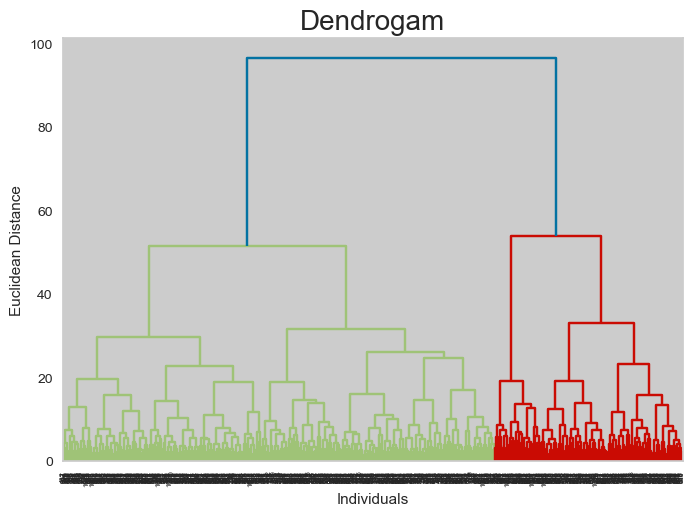

In [95]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(newData, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Individuals')
plt.ylabel('Euclidean Distance')
plt.show()

In [96]:
from sklearn.cluster import AgglomerativeClustering
#x=myData[['Science and technology','Religion','Fun with friends']]
x=newData
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean')
y_hc = hc.fit_predict(x)

In [97]:
silhouette_score(x,y_hc)

0.1314709710878038

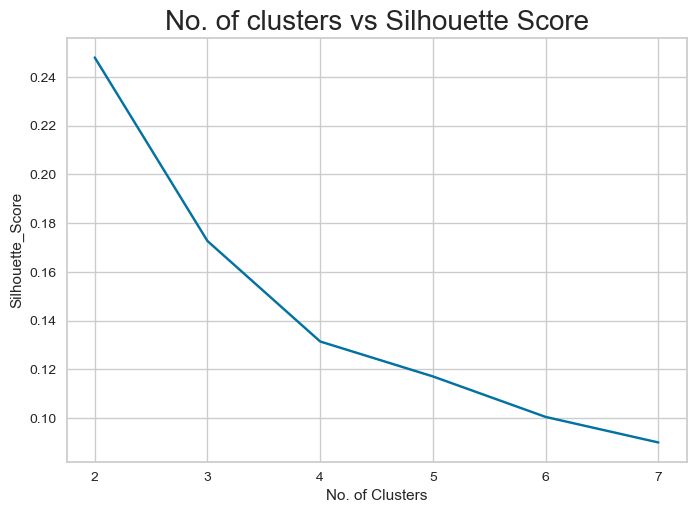

In [99]:
from sklearn.preprocessing import StandardScaler

#x=myData[['Science and technology', 'Religion', 'Fun with friends']]
x=newData

#scaler=StandardScaler()
#scaler.fit(x)
wcss = []
#x=scaler.transform(x)
for i in range(2, 8):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean')
    y_hc = hc.fit_predict(x)
    s=silhouette_score(x,y_hc)
    wcss.append(s)
plt.plot(range(2, 8), wcss)
plt.title('No. of clusters vs Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_Score')
plt.show()

### Evaluating Clustering Performance Using Advanced Techniques

In [100]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN(eps=0.3)
# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

print("Kmeans sillhouette: "+str(kmeans_silhouette))
print("Dbscan silhouette: "+str(dbscan_silhouette))

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
print("ARI statistika kmeans: " +str(round(ari_kmeans, 2)))
print("Ari statistika dbscan: "+str(round(ari_dbscan, 2)))# Unlike the silhouette coefficient,
# the ARI uses true cluster assignments to measure the similarity between true and predicted labels.

Kmeans sillhouette: 0.47
Dbscan silhouette: 0.38
ARI statistika kmeans: 0.3
Ari statistika dbscan: 1.0


In [64]:
myData.head()

Music  Slow songs or fast songs  Movies  History  Psychology  Politics  \
0    5.0                       3.0     5.0      1.0         5.0       1.0   
1    4.0                       4.0     5.0      1.0         3.0       4.0   
2    5.0                       5.0     5.0      1.0         2.0       1.0   
3    5.0                       3.0     5.0      4.0         4.0       5.0   
4    5.0                       3.0     5.0      3.0         2.0       3.0   

   Mathematics  Science and technology  Reading  Foreign languages  Religion  \
0          3.0                     4.0      3.0                5.0       1.0   
1          5.0                     3.0      4.0                5.0       1.0   
2          5.0                     2.0      5.0                5.0       5.0   
3          4.0                     3.0      5.0                4.0       4.0   
4          2.0                     3.0      5.0                3.0       4.0   

   Passive sport  Active sport  Fun with friends  Smoking  Alcohol  \
0            1.0           5.0               5.0      0.0      5.0   
1            1.0           1.0               4.0      0.0      5.0   
2            5.0           2.0               5.0      3.0      5.0   
3            1.0           1.0               2.0      5.0      5.0   
4            3.0           1.0               4.0      3.0      3.0   

   Writing notes  Thinking ahead  Keeping promises  Loss of interest  \
0            5.0             2.0               4.0               1.0   
1            4.0             4.0               4.0               3.0   
2            5.0             5.0               5.0               1.0   
3            4.0             3.0               4.0               5.0   
4            2.0             5.0               4.0               2.0   

   Friends versus money  Funniness  Fake  Empathy  Compassion to animals  \
0                   3.0        5.0   1.0      3.0                    5.0   
1                   4.0        3.0   2.0      2.0                    4.0   
2                   5.0        2.0   4.0      5.0                    4.0   
3                   2.0        1.0   1.0      3.0                    2.0   
4                   3.0        3.0   2.0      3.0                    3.0   

   Number of friends  Lying  Achievements  Happiness in life  \
0                  3    0.0           4.0                4.0   
1                  3    3.0           2.0                4.0   
2                  3    3.0           3.0                4.0   
3                  1    4.0           3.0                2.0   
4                  3    5.0           3.0                3.0   

   Interests or hobbies  Finances   Age  Number of siblings  Education  \
0                   3.0       3.0  20.0                 1.0        3.0   
1                   3.0       3.0  19.0                 2.0        3.0   
2                   5.0       2.0  20.0                 2.0        2.0   
3                   4.0       2.0  22.0                 1.0        3.0   
4                   3.0       4.0  20.0                 1.0        2.0   

   y_means  
0        3  
1        1  
2        0  
3        4  
4        0

### Pipeline

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [99]:
myColumns=myData.columns
print(myColumns)

Index(['Music', 'Slow songs or fast songs', 'Movies', 'History', 'Psychology',
       'Politics', 'Mathematics', 'Science and technology', 'Reading',
       'Foreign languages', 'Religion', 'Passive sport', 'Active sport',
       'Fun with friends', 'Smoking', 'Alcohol', 'Writing notes',
       'Thinking ahead', 'Keeping promises', 'Loss of interest',
       'Friends versus money', 'Funniness', 'Fake', 'Empathy',
       'Compassion to animals', 'God', 'Number of friends', 'Lying',
       'Achievements', 'Happiness in life', 'Interests or hobbies', 'Finances',
       'Age', 'Number of siblings', 'Education', 'Village - town', 'y_means'],
      dtype='object')


In [100]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(myColumns)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)
true_labels[:5]

array([22, 31, 21, 15, 27])

In [ ]:
from sklearn.decomposition import PCA


preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=2, random_state=42)),
        ]
    )

clusterer = Pipeline(
       [
          ("kmeans", KMeans(n_clusters=n_clusters, init="k-means++", n_init=50, max_iter=500, random_state=42,
          ),
          ),
       ]
   )
pipe = Pipeline(
     [
         ("preprocessor", preprocessor),
         ("clusterer", clusterer)
     ]
    )
pipe.fit(myData)

preprocessed_data = pipe["preprocessor"].transform(myData)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
print("silhouette score: "+str(silhouette_score(preprocessed_data, predicted_labels)))

print(predicted_labels.shape)
print(true_labels.shape)
print("adjusted rand score: "+str(adjusted_rand_score(true_labels, predicted_labels)))

## What kind of person are you?

In [102]:
Science=input("Input your science score 1-5: ")
Religion=input("Input your religion score 1-5: ")
FWF=input("Input your fun with friends score 1-5: ")

In [146]:
Religion=input("Input your religion score 1-5: ")

In [147]:
FWF=input("Input your fun with friends score 1-5: ")

### Little fun never killed nobody

In [103]:
import tkinter as tk
#Science=input("Input your science score 1-5: ")
#Religion=input("Input your religion score 1-5: ")
#FWF=input("Input your fun with friends score 1-5: ")
def function(Science, Religion, FWF):
      global pom
      test=[[Science, Religion, FWF]]
      y_means=km.predict(test)
      print("Group: "+str(y_means[0]))
      if y_means[0]==0:
            pom="You are identified to be a good person but a little confused!"
            #print("You are identified to be a good person but a little confused!")
      elif y_means[0]==1:
            pom="You are identified to be a likeable person but manipulative and not heartfelt!"
            #print("You are identified to be a likeable person but manipulative and not heartfelt!")
      elif y_means[0]==2:
            pom="You are identified to be an valuable person and student!"
            #print("You are identified to be an valuable person and student!")
      elif y_means[0]==3:
            pom="You are identified to be a atheist but smart!"
            #print("You are identified to be a atheist but smart!")
      elif y_means[0]==4:
            pom="You are identified to be a introvert atheist with no knowledge of science!"
            #print("You are identified to be a introvert atheist with no knowledge of science!")
      else:
            pom="You are identified to be an outcast!"
            #print("You are identified to be an outcast!")
#function(Science, Religion, FWF)
#print(pom)
import tkinter as tk
from tkinter import messagebox
import csv

def on_submit():
    if not all(var.get() for var in vars):
        messagebox.showerror("Error", "Not all radio buttons are selected!")
    else:
        Science = science_var.get()
        Religion = religion_var.get()
        FWF = fwf_var.get()
        function(Science, Religion, FWF)
        result_label.config(text=pom)
        if first_name_entry.get() and last_name_entry.get():
            save_to_csv(first_name_entry.get(), last_name_entry.get(), Science, Religion, FWF, pom)

def save_to_csv(first_name, last_name, science, religion, fwf, result):
    with open('results.csv', mode='a') as csv_file:
        fieldnames = ['First Name', 'Last Name', 'Science', 'Religion', 'FWF', 'Result']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writerow({'First Name': first_name, 'Last Name': last_name, 'Science': science, 'Religion': religion, 'FWF': fwf, 'Result': result})

root = tk.Tk()
root.title("User Input")
root.geometry("500x500")

first_name_label = tk.Label(root, text="First Name: ")
first_name_label.grid(row=0, column=0, sticky="W", pady=10)

first_name_entry = tk.Entry(root)
first_name_entry.grid(row=0, column=1)

last_name_label = tk.Label(root, text="Last Name: ")
last_name_label.grid(row=1, column=0, sticky="W", pady=10)

last_name_entry = tk.Entry(root)
last_name_entry.grid(row=1, column=1)

science_label = tk.Label(root, text="Select Science: ")
science_label.grid(row=2, column=0, sticky="W", pady=10)

science_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=science_var, value=i).grid(row=3, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

religion_label = tk.Label(root, text="Select Religion: ")
religion_label.grid(row=4, column=0, sticky="W", pady=10)

religion_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=religion_var, value=i).grid(row=5, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

fwf_label = tk.Label(root, text="Select FWF: ")
fwf_label.grid(row=6, column=0, sticky="W", pady=10)

fwf_var = tk.IntVar()

for i in range(1, 6):
    tk.Radiobutton(root, variable=fwf_var, value=i).grid(row=7, column=i-1, padx=20)
root.grid_columnconfigure(2, minsize=40)

vars = [science_var, religion_var, fwf_var]

submit_button = tk.Button(root, text="Submit", bg="blue", command=on_submit)
submit_button.grid(row=8, column=2)

result_label = tk.Label(root, text="", font=("Arial", 14))
result_label.grid(row=9, column=0, columnspan=5, pady=10)
result_label.config(text="Results")
result_label.config(fg="blue", font=("Arial", 20, "bold"))
result_label.config(anchor="center")
result_label.config(width=20, height=4, wraplength=400)
root.grid_columnconfigure(0, weight=1)
root.grid_rowconfigure(9, weight=1)

close_button = tk.Button(root, text="Close", bg="red", command=root.destroy)
close_button.grid(row=10, column=2)

root.mainloop()


#Science=input("Input your science score 1-5: ")
#Religion=input("Input your religion score 1-5: ")
#FWF=input("Input your fun with friends score 1-5: ")


c:\Users\Legion\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Group: 2
